In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy as sp

In [3]:
import statsmodels.api as sm

In [141]:
train = pd.read_csv('train.csv')

In [142]:
test = pd.read_csv('test.csv')

# Introduction

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [8]:
train.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [9]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train.isna().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<Axes: >

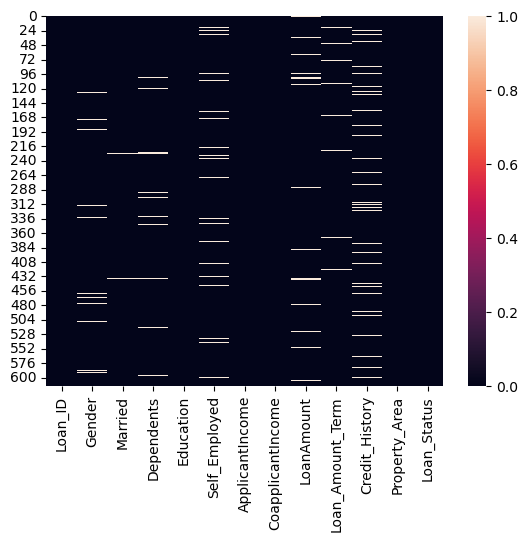

In [11]:
sns.heatmap(train.isna())

In [12]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
train['Loan_ID'].is_unique

True

In [143]:
train.drop(columns=['Loan_ID'], inplace=True)

In [144]:
train['Loan_Status'] = train['Loan_Status'].apply(lambda x : 1 if x=='Y' else 0)

In [145]:
continuous = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [146]:
categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

# Data Visualization

## histogram

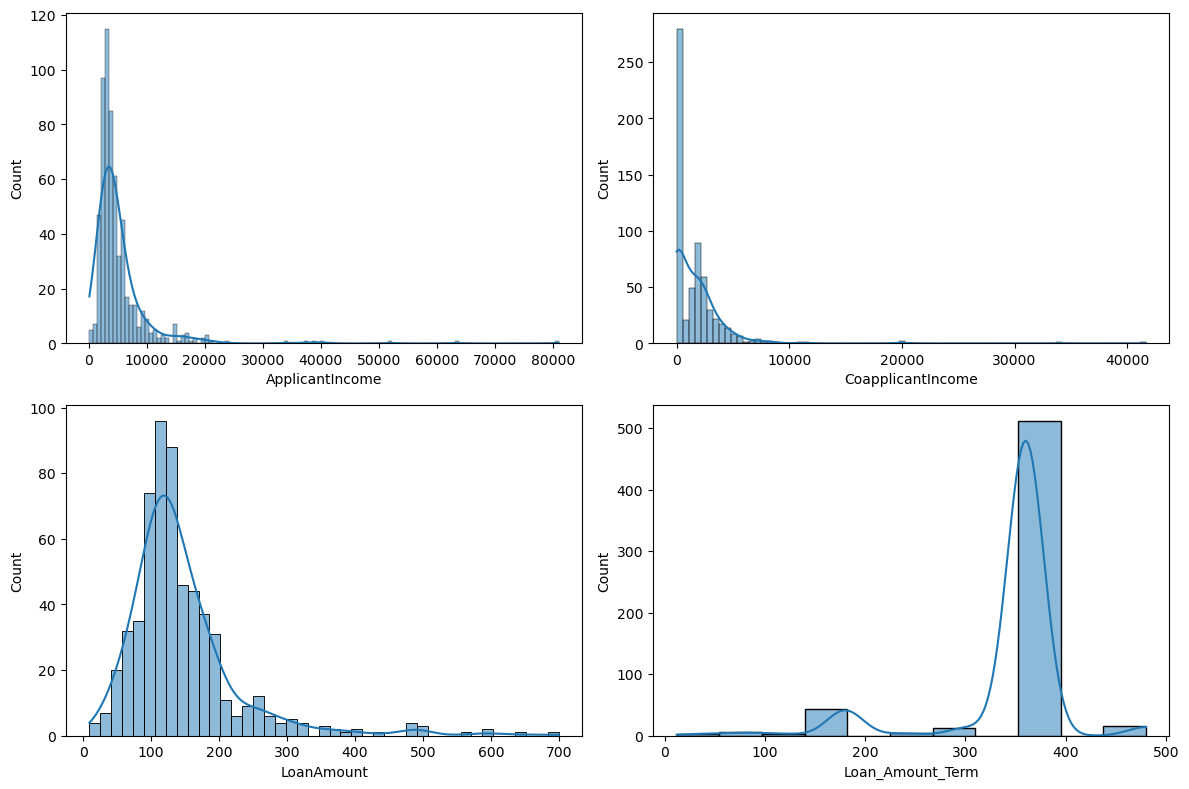

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.histplot(x=train[continuous[i]], ax=ax, kde=True)
plt.tight_layout()

## boxplot

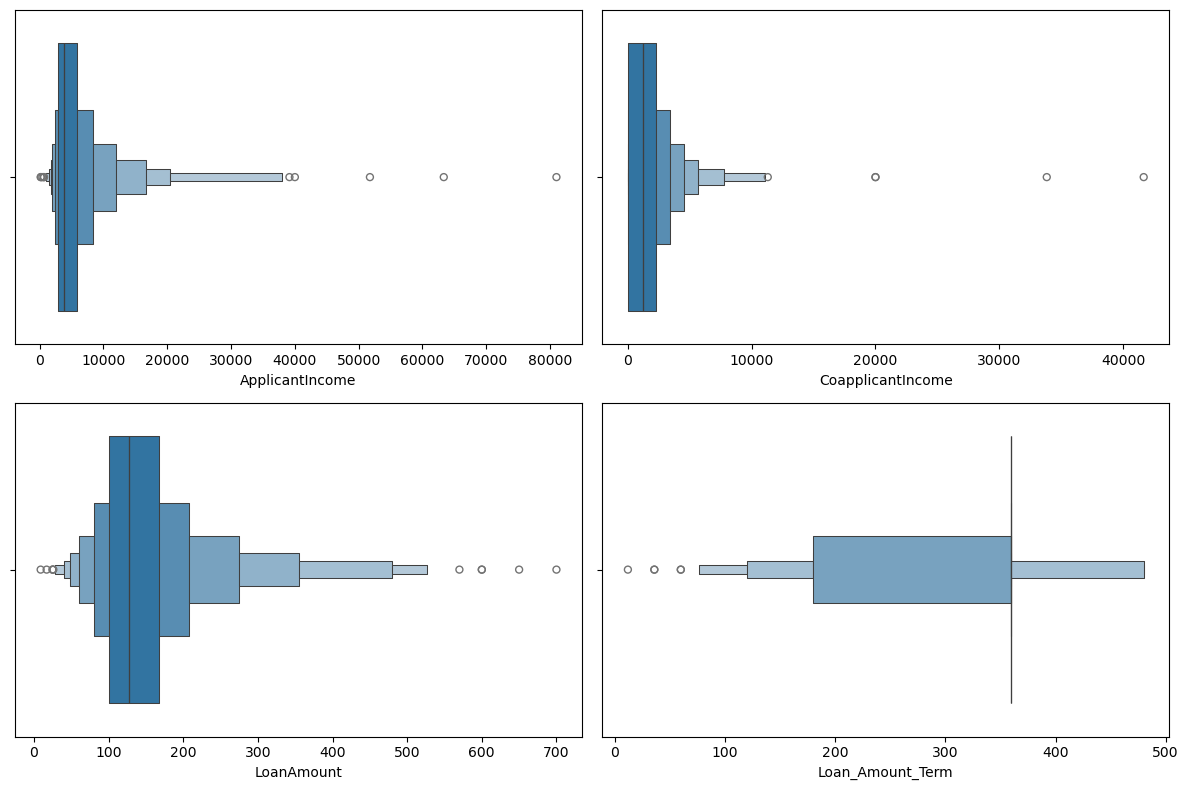

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.boxenplot(x=train[continuous[i]], ax=ax)
plt.tight_layout()

## count plot

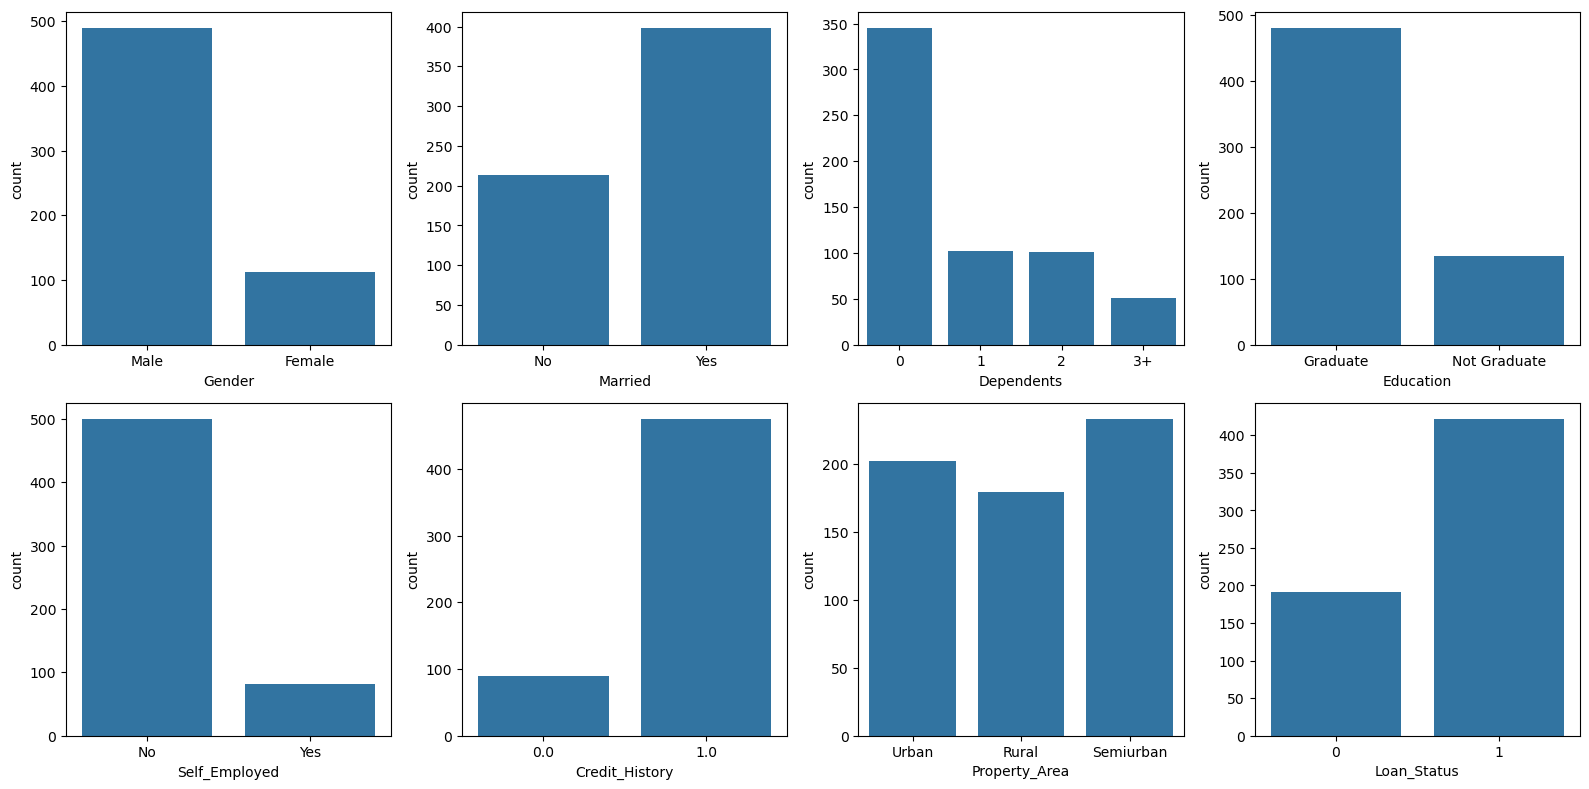

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.countplot(x=train[categorical[i]], ax=ax)
plt.tight_layout()

## bar plot

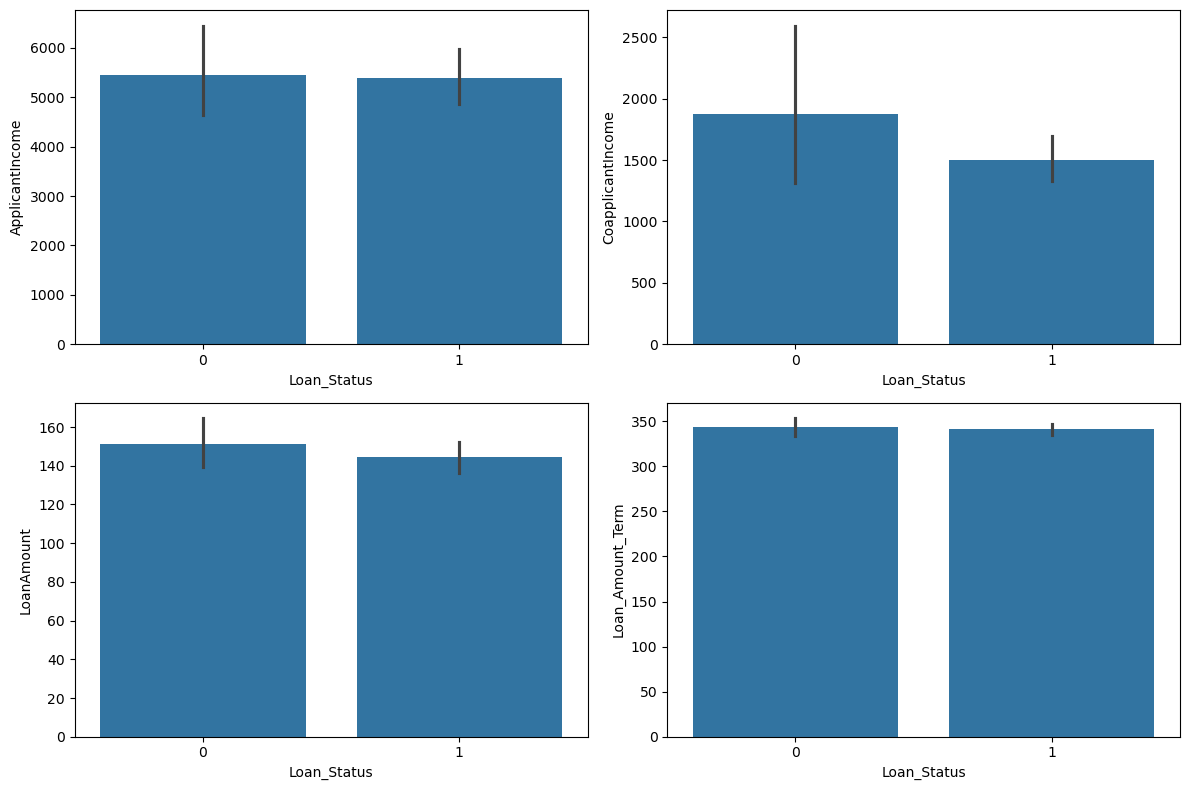

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(y=train[continuous[i]], x=train['Loan_Status'], ax=ax)
plt.tight_layout()

## regplot

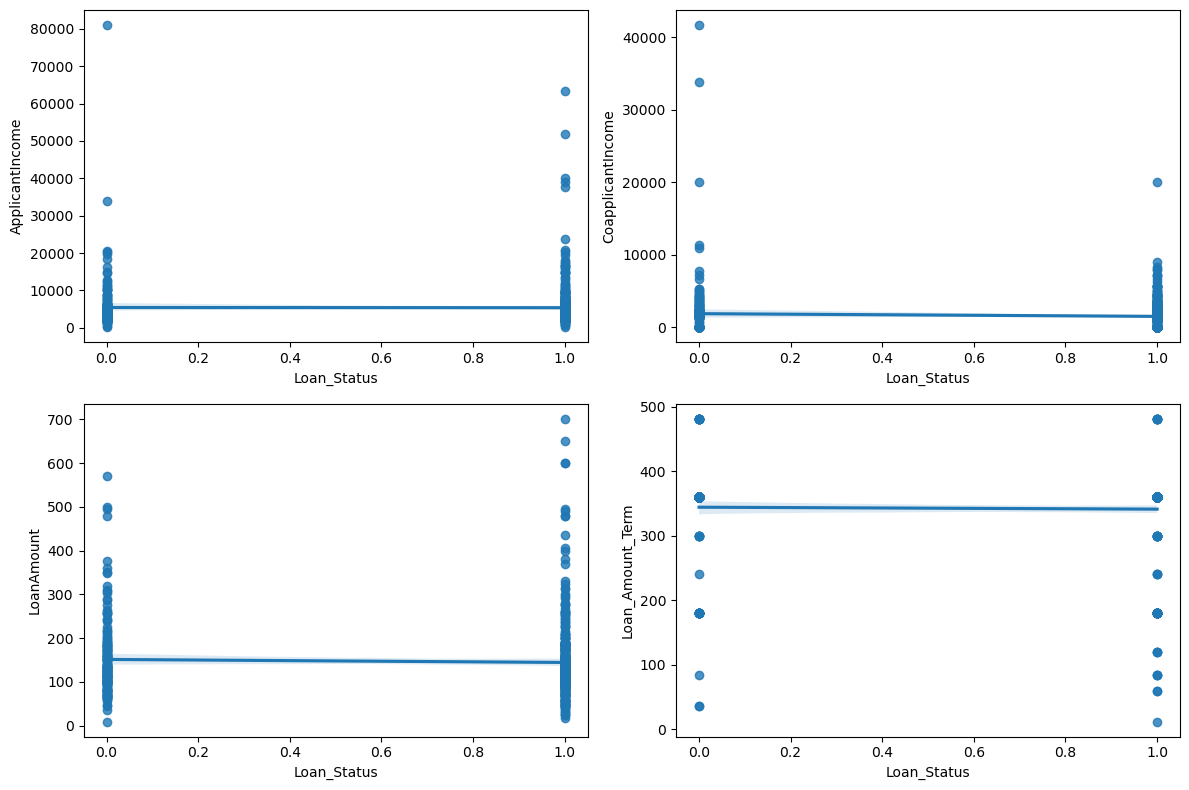

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.regplot(y=train[continuous[i]], x=train['Loan_Status'], ax=ax)
plt.tight_layout()

## count plot with target variable

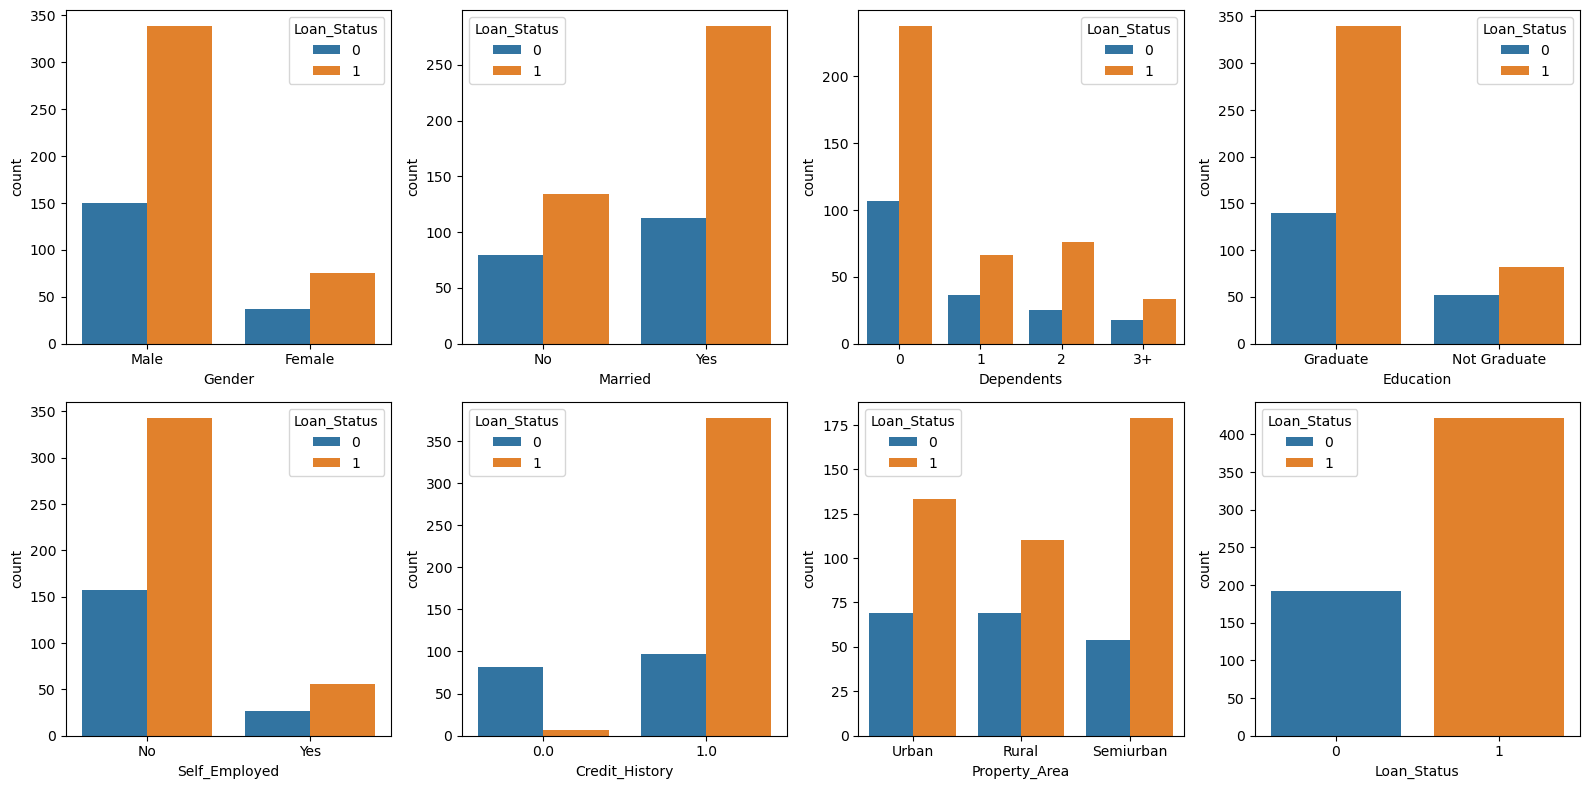

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.countplot(x=train[categorical[i]], hue=train['Loan_Status'], ax=ax)
plt.tight_layout()

## normalized plots

In [24]:
pd.crosstab(train['Loan_Status'], train['Gender'], normalize=True, margins=True)

Gender         Female      Male       All
Loan_Status                              
0            0.061564  0.249584  0.311148
1            0.124792  0.564060  0.688852
All          0.186356  0.813644  1.000000

<Axes: xlabel='Loan_Status'>

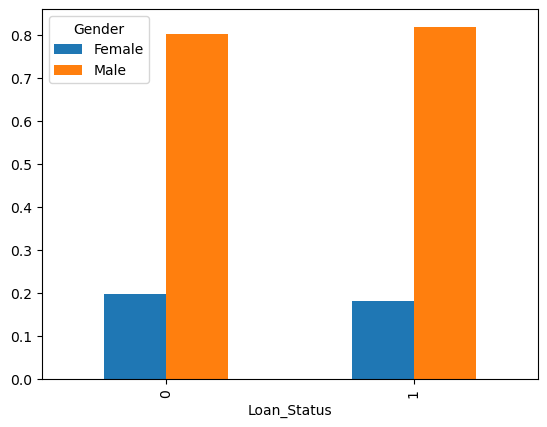

In [25]:
pd.crosstab(train['Loan_Status'], train['Gender'], normalize='index', margins=False).plot.bar()

<Axes: xlabel='Loan_Status'>

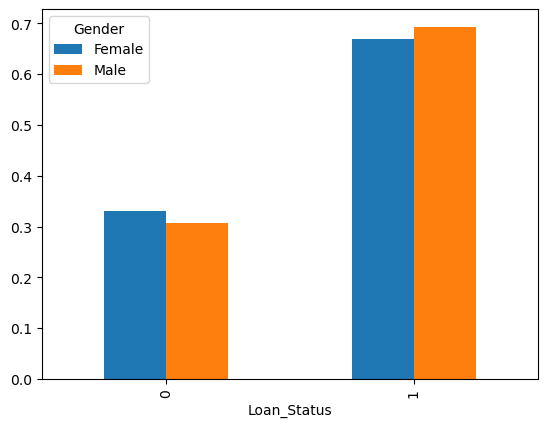

In [26]:
pd.crosstab(train['Loan_Status'], train['Gender'], normalize='columns').plot.bar()

<Axes: xlabel='Gender'>

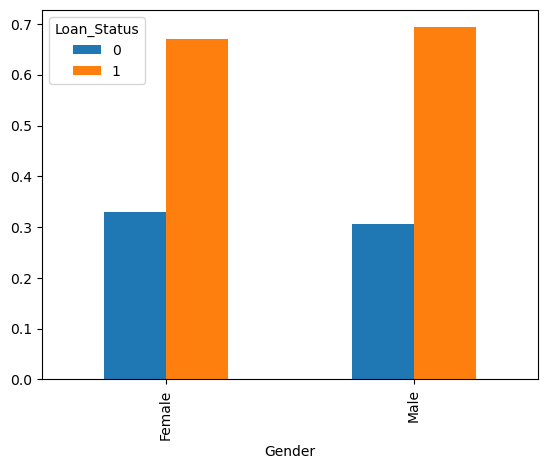

In [27]:
pd.crosstab(train['Gender'], train['Loan_Status'], normalize='index').plot.bar()

<Axes: xlabel='Gender'>

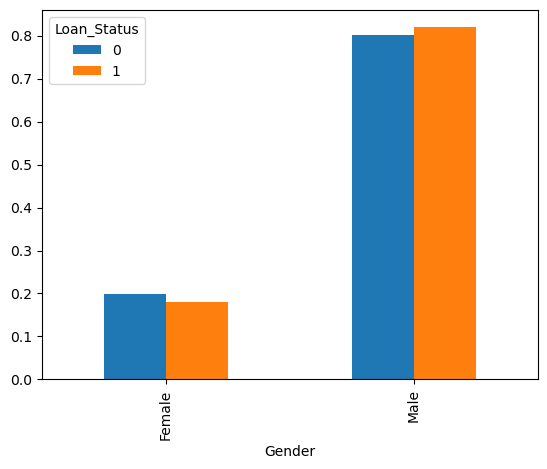

In [28]:
pd.crosstab(train['Gender'], train['Loan_Status'], normalize='columns').plot.bar()

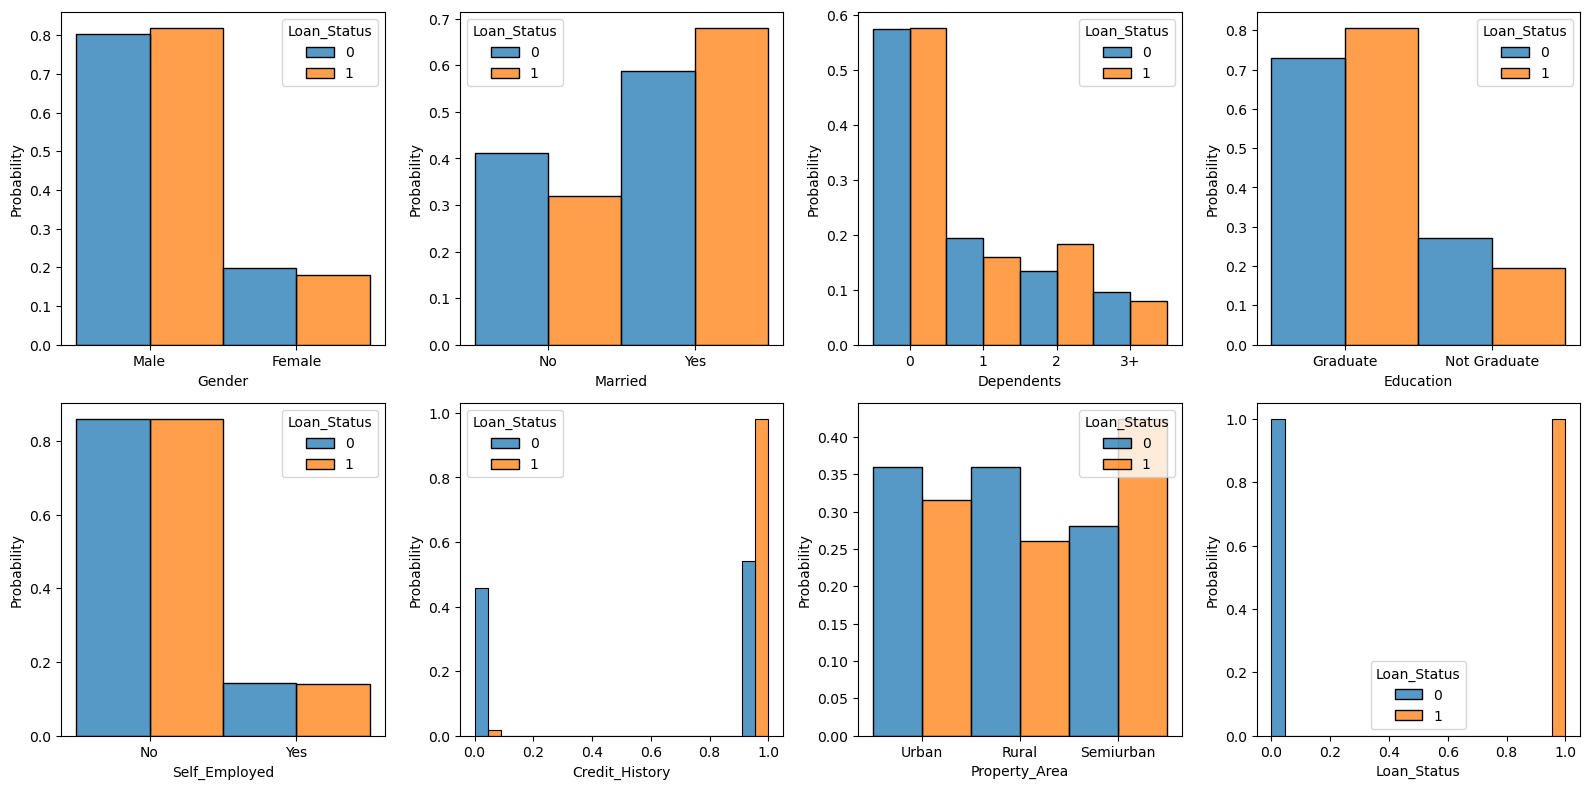

In [29]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.histplot(x=train[categorical[i]], hue=train['Loan_Status'], multiple='dodge', stat='probability', common_norm=False, ax=ax)
plt.tight_layout()

In the above plots, compare the bars in each category to know the association between category and label class.

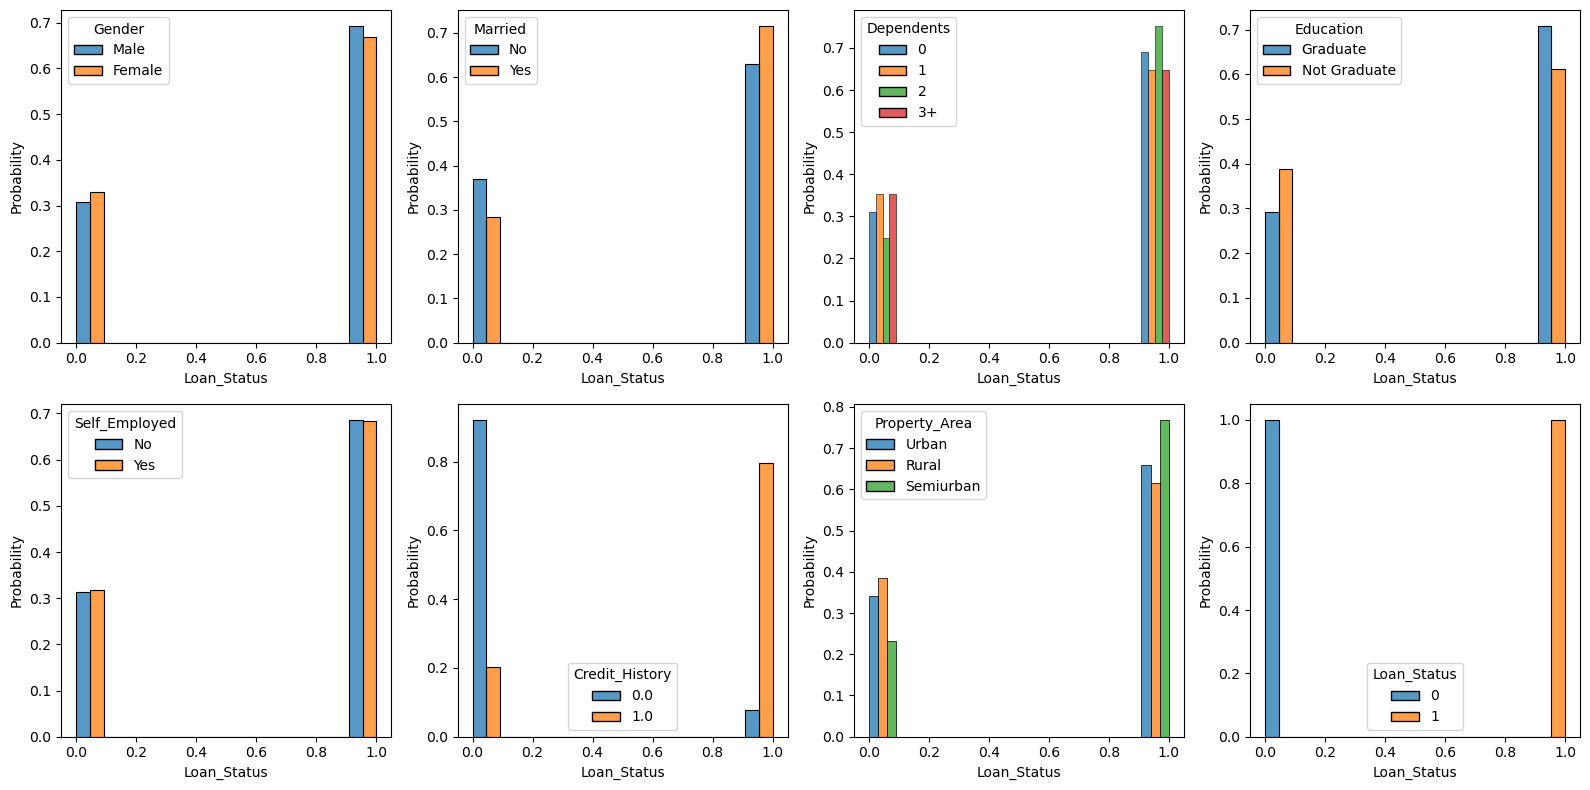

In [30]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.histplot(x=train['Loan_Status'], hue=train[categorical[i]], multiple='dodge', stat='probability', common_norm=False, ax=ax)
plt.tight_layout()

In the above plots, compare the bars in each label class to know the association between category and label class.

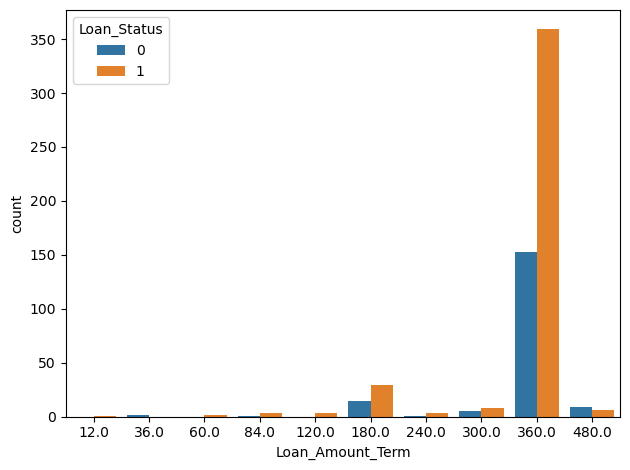

In [31]:
sns.countplot(x=train['Loan_Amount_Term'], hue=train['Loan_Status'])
plt.tight_layout()

In [32]:
train.corr(numeric_only=True)

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   
Loan_Status              -0.004710          -0.059187   -0.037318   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.045306       -0.014715    -0.004710  
CoapplicantIncome         -0.059878       -0.002056    -0.059187  
LoanAmount                 0.039447       -0.008433    -0.037318  
Loan_Amount_Term           1.000000        0.001470    -0.021268  
Credit_History             0.001470        1.000000     0.561678  
Loan_Status               -0.021268        0.561678     1.000000

## pair plot

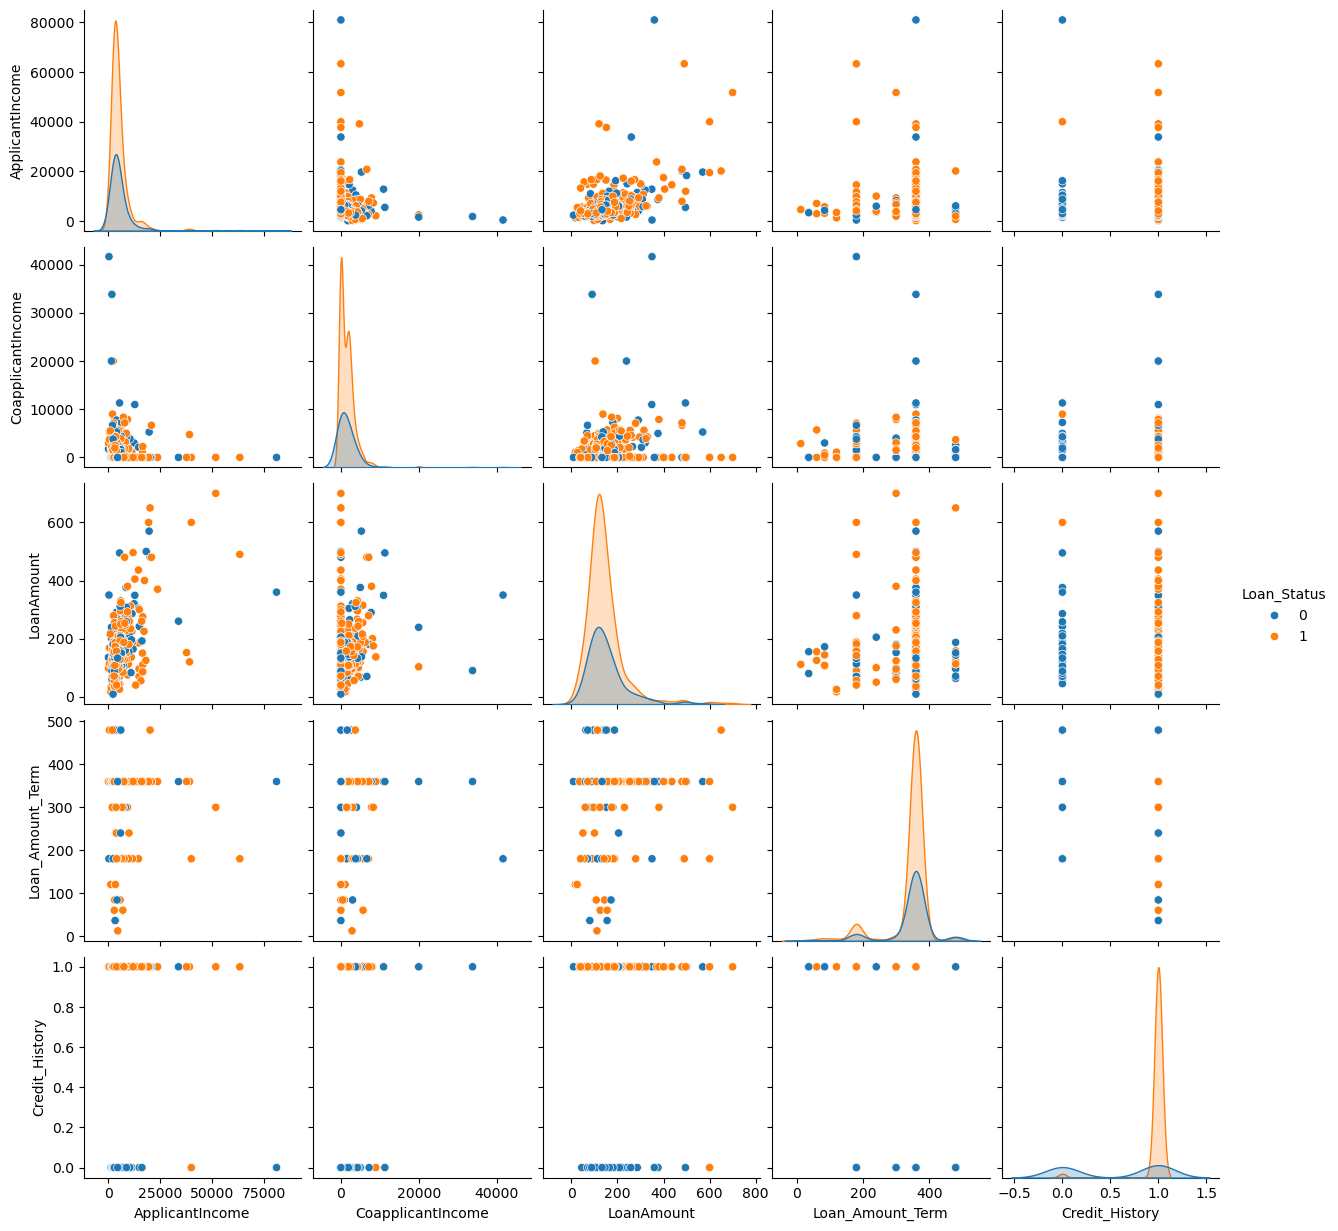

In [33]:
sns.pairplot(train.iloc[:, 5:], hue='Loan_Status')

# correlations

In [34]:
continuous

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [35]:
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [36]:
from itertools import product

In [37]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.nanmean(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [38]:
def cat_cont(df, categorical_features, continuous_features):
    eta_corr = []
    for pair in product(categorical_features, continuous_features):
        try:
            eta_corr.append(correlation_ratio(df[pair[0]], df[pair[1]]))
        except ValueError:
            eta_corr.append(0)
    eta_corr = np.array(eta_corr).reshape(len(categorical_features),len(continuous_features))
    eta_corr = pd.DataFrame(eta_corr, index=categorical_features, columns=continuous_features)
    return eta_corr

In [39]:
cat_cont_corr = cat_cont(train, categorical, continuous)

In [40]:
cat_cont_corr

ApplicantIncome  CoapplicantIncome  LoanAmount  \
Gender                 0.050672           0.083658    0.103532   
Married                0.051304           0.077726    0.152096   
Dependents             0.168726           0.048789    0.189647   
Education              0.140760           0.062290    0.175369   
Self_Employed          0.129354           0.009226    0.122029   
Credit_History         0.014476           0.001664    0.008037   
Property_Area          0.017427           0.028671    0.047818   
Loan_Status            0.004710           0.059187    0.038242   

                Loan_Amount_Term  
Gender                  0.075638  
Married                 0.104416  
Dependents              0.131139  
Education               0.080358  
Self_Employed           0.036673  
Credit_History          0.001440  
Property_Area           0.100034  
Loan_Status             0.021566

In [41]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = sp.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [42]:
def cat_cat(df, cat_features):
    cramers_v_corr = []
    for pair in product(cat_features, repeat=2):
        try:
            cramers_v_corr.append(cramers_v(df[pair[0]], df[pair[1]]))
        except ValueError:
            cramers_v_corr.append(0)
    cramers_v_corr = np.array(cramers_v_corr).reshape(len(cat_features),len(cat_features))
    cramers_v_corr = pd.DataFrame(cramers_v_corr, index=cat_features, columns=cat_features)
    return cramers_v_corr

In [43]:
cat_cat_corr = cat_cat(train, categorical)

In [44]:
cat_cat_corr

Gender   Married  Dependents  Education  Self_Employed  \
Gender          0.994504  0.363110    0.166717   0.016721       0.000000   
Married         0.363110  0.996390    0.363311   0.000000       0.000000   
Dependents      0.166717  0.363311    1.000000   0.000000       0.074534   
Education       0.016721  0.000000    0.000000   0.995219       0.000000   
Self_Employed   0.000000  0.000000    0.074534   0.000000       0.992890   
Credit_History  0.000000  0.000000    0.000000   0.063178       0.000000   
Property_Area   0.100240  0.000000    0.029845   0.052455       0.000000   
Loan_Status     0.000000  0.075459    0.016012   0.070997       0.000000   

                Credit_History  Property_Area  Loan_Status  
Gender                0.000000       0.100240     0.000000  
Married               0.000000       0.000000     0.075459  
Dependents            0.000000       0.029845     0.016012  
Education             0.063178       0.052455     0.070997  
Self_Employed         0.000000       0.000000     0.000000  
Credit_History        0.993317       0.000000     0.555349  
Property_Area         0.000000       1.000000     0.129590  
Loan_Status           0.555349       0.129590     0.996205

In [45]:
train.loc[:, continuous].corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   

                   Loan_Amount_Term  
ApplicantIncome           -0.045306  
CoapplicantIncome         -0.059878  
LoanAmount                 0.039447  
Loan_Amount_Term           1.000000

In [46]:
pd.merge(cat_cat_corr, cat_cont_corr, left_index=True, right_index=True)

Gender   Married  Dependents  Education  Self_Employed  \
Gender          0.994504  0.363110    0.166717   0.016721       0.000000   
Married         0.363110  0.996390    0.363311   0.000000       0.000000   
Dependents      0.166717  0.363311    1.000000   0.000000       0.074534   
Education       0.016721  0.000000    0.000000   0.995219       0.000000   
Self_Employed   0.000000  0.000000    0.074534   0.000000       0.992890   
Credit_History  0.000000  0.000000    0.000000   0.063178       0.000000   
Property_Area   0.100240  0.000000    0.029845   0.052455       0.000000   
Loan_Status     0.000000  0.075459    0.016012   0.070997       0.000000   

                Credit_History  Property_Area  Loan_Status  ApplicantIncome  \
Gender                0.000000       0.100240     0.000000         0.050672   
Married               0.000000       0.000000     0.075459         0.051304   
Dependents            0.000000       0.029845     0.016012         0.168726   
Education             0.063178       0.052455     0.070997         0.140760   
Self_Employed         0.000000       0.000000     0.000000         0.129354   
Credit_History        0.993317       0.000000     0.555349         0.014476   
Property_Area         0.000000       1.000000     0.129590         0.017427   
Loan_Status           0.555349       0.129590     0.996205         0.004710   

                CoapplicantIncome  LoanAmount  Loan_Amount_Term  
Gender                   0.083658    0.103532          0.075638  
Married                  0.077726    0.152096          0.104416  
Dependents               0.048789    0.189647          0.131139  
Education                0.062290    0.175369          0.080358  
Self_Employed            0.009226    0.122029          0.036673  
Credit_History           0.001664    0.008037          0.001440  
Property_Area            0.028671    0.047818          0.100034  
Loan_Status              0.059187    0.038242          0.021566

In [47]:
pd.concat([cat_cont_corr, train.loc[:, continuous].corr()])

ApplicantIncome  CoapplicantIncome  LoanAmount  \
Gender                    0.050672           0.083658    0.103532   
Married                   0.051304           0.077726    0.152096   
Dependents                0.168726           0.048789    0.189647   
Education                 0.140760           0.062290    0.175369   
Self_Employed             0.129354           0.009226    0.122029   
Credit_History            0.014476           0.001664    0.008037   
Property_Area             0.017427           0.028671    0.047818   
Loan_Status               0.004710           0.059187    0.038242   
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   

                   Loan_Amount_Term  
Gender                     0.075638  
Married                    0.104416  
Dependents                 0.131139  
Education                  0.080358  
Self_Employed              0.036673  
Credit_History             0.001440  
Property_Area              0.100034  
Loan_Status                0.021566  
ApplicantIncome           -0.045306  
CoapplicantIncome         -0.059878  
LoanAmount                 0.039447  
Loan_Amount_Term           1.000000

In [48]:
all_corr = pd.concat([pd.merge(cat_cat_corr, cat_cont_corr, left_index=True, right_index=True), train.loc[:, continuous].corr()])

In [49]:
all_corr

Gender   Married  Dependents  Education  Self_Employed  \
Gender             0.994504  0.363110    0.166717   0.016721       0.000000   
Married            0.363110  0.996390    0.363311   0.000000       0.000000   
Dependents         0.166717  0.363311    1.000000   0.000000       0.074534   
Education          0.016721  0.000000    0.000000   0.995219       0.000000   
Self_Employed      0.000000  0.000000    0.074534   0.000000       0.992890   
Credit_History     0.000000  0.000000    0.000000   0.063178       0.000000   
Property_Area      0.100240  0.000000    0.029845   0.052455       0.000000   
Loan_Status        0.000000  0.075459    0.016012   0.070997       0.000000   
ApplicantIncome         NaN       NaN         NaN        NaN            NaN   
CoapplicantIncome       NaN       NaN         NaN        NaN            NaN   
LoanAmount              NaN       NaN         NaN        NaN            NaN   
Loan_Amount_Term        NaN       NaN         NaN        NaN            NaN   

                   Credit_History  Property_Area  Loan_Status  \
Gender                   0.000000       0.100240     0.000000   
Married                  0.000000       0.000000     0.075459   
Dependents               0.000000       0.029845     0.016012   
Education                0.063178       0.052455     0.070997   
Self_Employed            0.000000       0.000000     0.000000   
Credit_History           0.993317       0.000000     0.555349   
Property_Area            0.000000       1.000000     0.129590   
Loan_Status              0.555349       0.129590     0.996205   
ApplicantIncome               NaN            NaN          NaN   
CoapplicantIncome             NaN            NaN          NaN   
LoanAmount                    NaN            NaN          NaN   
Loan_Amount_Term              NaN            NaN          NaN   

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
Gender                    0.050672           0.083658    0.103532   
Married                   0.051304           0.077726    0.152096   
Dependents                0.168726           0.048789    0.189647   
Education                 0.140760           0.062290    0.175369   
Self_Employed             0.129354           0.009226    0.122029   
Credit_History            0.014476           0.001664    0.008037   
Property_Area             0.017427           0.028671    0.047818   
Loan_Status               0.004710           0.059187    0.038242   
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   

                   Loan_Amount_Term  
Gender                     0.075638  
Married                    0.104416  
Dependents                 0.131139  
Education                  0.080358  
Self_Employed              0.036673  
Credit_History             0.001440  
Property_Area              0.100034  
Loan_Status                0.021566  
ApplicantIncome           -0.045306  
CoapplicantIncome         -0.059878  
LoanAmount                 0.039447  
Loan_Amount_Term           1.000000

In [50]:
cat_cont_corr.T

Gender   Married  Dependents  Education  Self_Employed  \
ApplicantIncome    0.050672  0.051304    0.168726   0.140760       0.129354   
CoapplicantIncome  0.083658  0.077726    0.048789   0.062290       0.009226   
LoanAmount         0.103532  0.152096    0.189647   0.175369       0.122029   
Loan_Amount_Term   0.075638  0.104416    0.131139   0.080358       0.036673   

                   Credit_History  Property_Area  Loan_Status  
ApplicantIncome          0.014476       0.017427     0.004710  
CoapplicantIncome        0.001664       0.028671     0.059187  
LoanAmount               0.008037       0.047818     0.038242  
Loan_Amount_Term         0.001440       0.100034     0.021566

In [51]:
all_corr.update(cat_cont_corr.T)

In [52]:
all_corr

Gender   Married  Dependents  Education  Self_Employed  \
Gender             0.994504  0.363110    0.166717   0.016721       0.000000   
Married            0.363110  0.996390    0.363311   0.000000       0.000000   
Dependents         0.166717  0.363311    1.000000   0.000000       0.074534   
Education          0.016721  0.000000    0.000000   0.995219       0.000000   
Self_Employed      0.000000  0.000000    0.074534   0.000000       0.992890   
Credit_History     0.000000  0.000000    0.000000   0.063178       0.000000   
Property_Area      0.100240  0.000000    0.029845   0.052455       0.000000   
Loan_Status        0.000000  0.075459    0.016012   0.070997       0.000000   
ApplicantIncome    0.050672  0.051304    0.168726   0.140760       0.129354   
CoapplicantIncome  0.083658  0.077726    0.048789   0.062290       0.009226   
LoanAmount         0.103532  0.152096    0.189647   0.175369       0.122029   
Loan_Amount_Term   0.075638  0.104416    0.131139   0.080358       0.036673   

                   Credit_History  Property_Area  Loan_Status  \
Gender                   0.000000       0.100240     0.000000   
Married                  0.000000       0.000000     0.075459   
Dependents               0.000000       0.029845     0.016012   
Education                0.063178       0.052455     0.070997   
Self_Employed            0.000000       0.000000     0.000000   
Credit_History           0.993317       0.000000     0.555349   
Property_Area            0.000000       1.000000     0.129590   
Loan_Status              0.555349       0.129590     0.996205   
ApplicantIncome          0.014476       0.017427     0.004710   
CoapplicantIncome        0.001664       0.028671     0.059187   
LoanAmount               0.008037       0.047818     0.038242   
Loan_Amount_Term         0.001440       0.100034     0.021566   

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
Gender                    0.050672           0.083658    0.103532   
Married                   0.051304           0.077726    0.152096   
Dependents                0.168726           0.048789    0.189647   
Education                 0.140760           0.062290    0.175369   
Self_Employed             0.129354           0.009226    0.122029   
Credit_History            0.014476           0.001664    0.008037   
Property_Area             0.017427           0.028671    0.047818   
Loan_Status               0.004710           0.059187    0.038242   
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   

                   Loan_Amount_Term  
Gender                     0.075638  
Married                    0.104416  
Dependents                 0.131139  
Education                  0.080358  
Self_Employed              0.036673  
Credit_History             0.001440  
Property_Area              0.100034  
Loan_Status                0.021566  
ApplicantIncome           -0.045306  
CoapplicantIncome         -0.059878  
LoanAmount                 0.039447  
Loan_Amount_Term           1.000000

<Axes: >

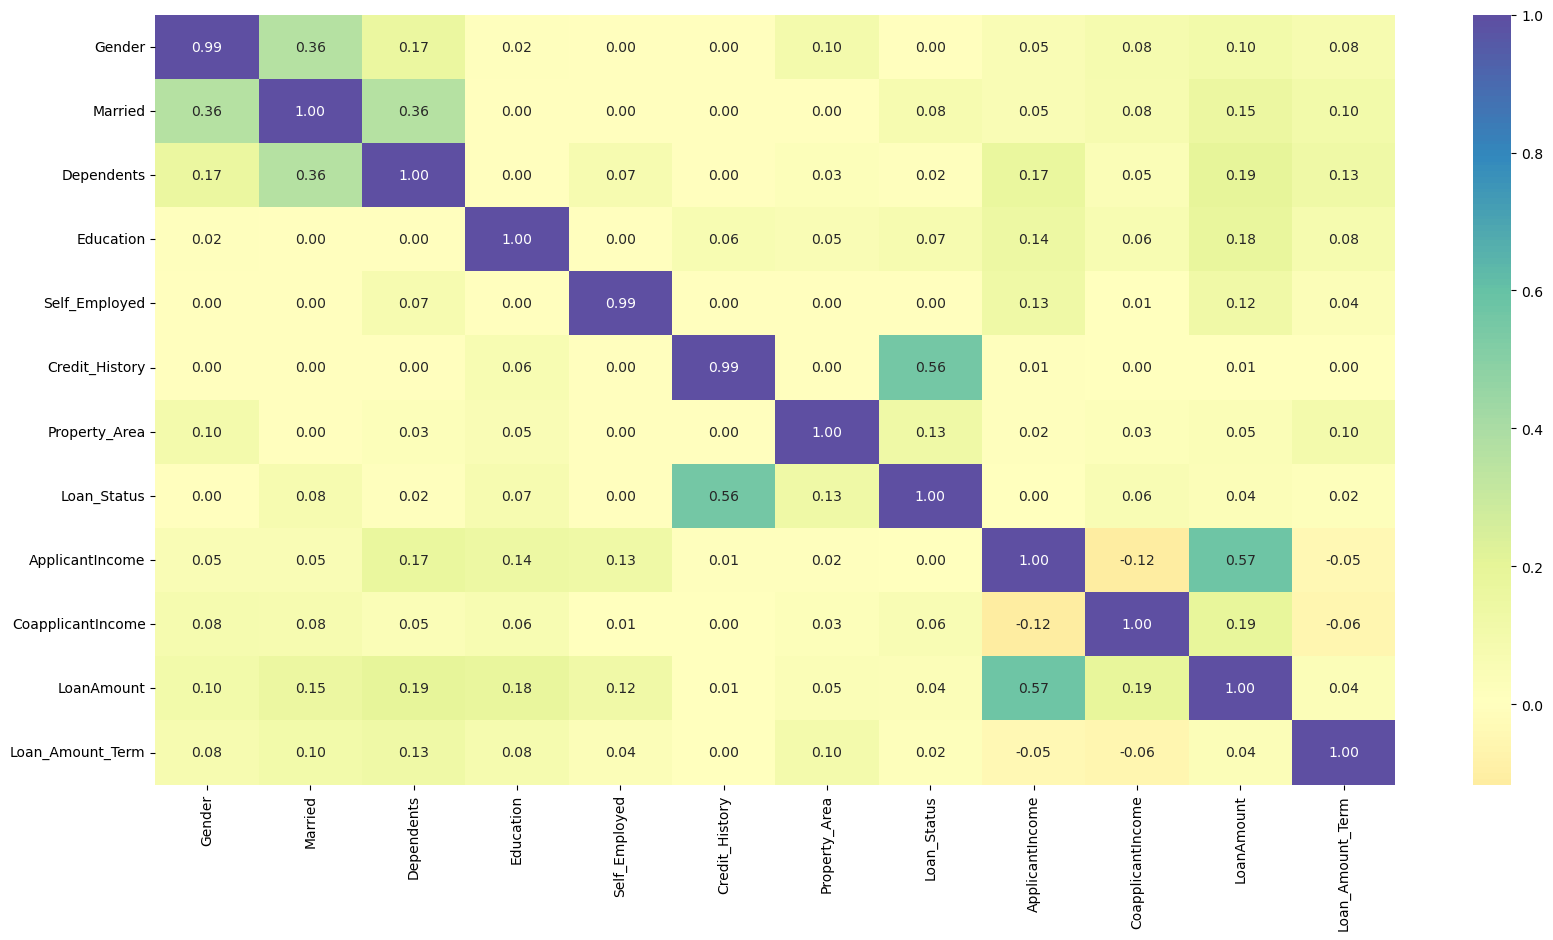

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(all_corr, annot=True, cmap='Spectral', center=0, fmt='.2f')

In [54]:
pd.crosstab(train['Gender'], train['Dependents'], normalize='index') / train['Dependents'].value_counts()*10000 

Dependents          0          1          2         3+
Gender                                                
Female      21.273767  17.089405   6.358434   5.396654
Male        15.677696  16.853702  19.096249  18.497965

In [55]:
def cross_tab(col1, col2, figsize = (12,6)):
    plt.figure(figsize=figsize)
    sns.heatmap(pd.crosstab(col1, col2, normalize='index') / col2.value_counts()*10000,
                annot=True, center=0, cmap='Spectral')

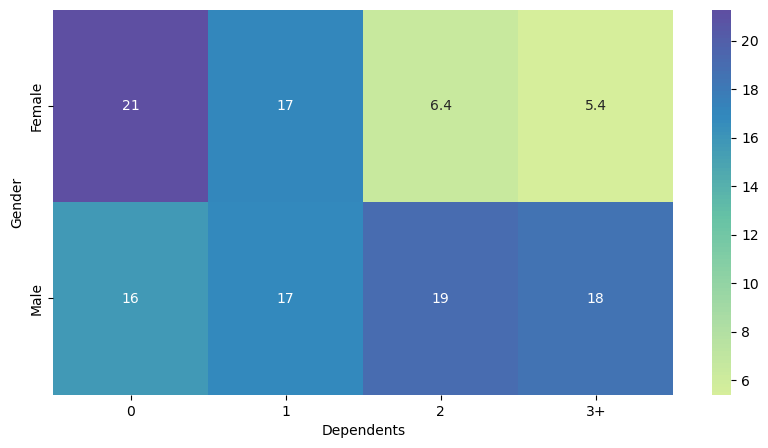

In [56]:
cross_tab(train['Gender'], train['Dependents'], (10,5))

In [57]:
class Correlations:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        if numerator == 0:
            eta = 0.0
        else:
            eta = np.sqrt(numerator/denominator)
        return eta
    def square(self):
        return self.x**self.y
    def cube(self, w):
        return Correlations.square(self)**w

# Variable analysis

## Applicant Income

In [58]:
train['ApplicantIncome'].min()

150

In [59]:
train['ApplicantIncome'].max()

81000

In [60]:
train['ApplicantIncome'].median()

3812.5

In [61]:
train['ApplicantIncome'].mean()

5403.459283387622

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

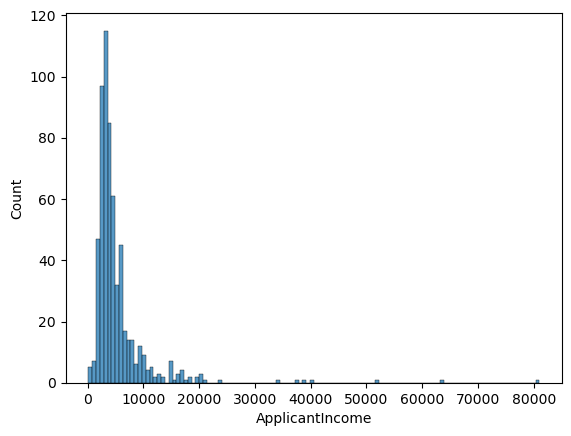

In [62]:
sns.histplot(train['ApplicantIncome'])

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

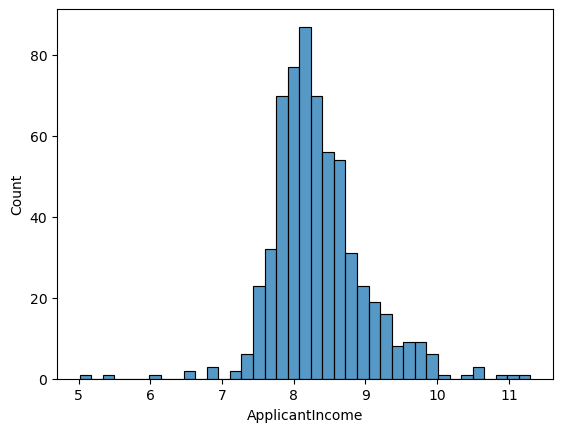

In [63]:
sns.histplot(np.log(train['ApplicantIncome']))

In [64]:
from scipy.stats import yeojohnson

<Axes: ylabel='Count'>

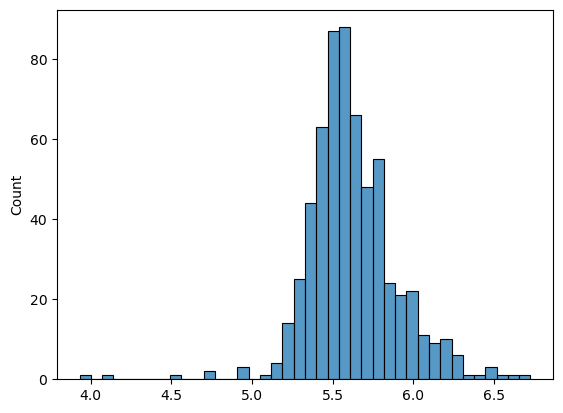

In [65]:
sns.histplot(yeojohnson(train['ApplicantIncome'], lmbda=None)[0])

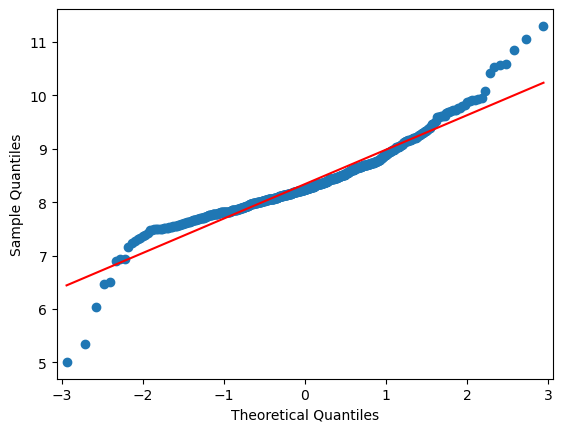

In [66]:
sm.qqplot(np.log(train['ApplicantIncome']), line='s');

## Co-applicant Income

In [67]:
train['CoapplicantIncome'].min()

0.0

In [68]:
train.shape

(614, 12)

In [69]:
train[train['CoapplicantIncome']==0]['Loan_Status'].value_counts()

Loan_Status
1    177
0     96
Name: count, dtype: int64

In [70]:
train[train['CoapplicantIncome']!=0]['Loan_Status'].value_counts()

Loan_Status
1    245
0     96
Name: count, dtype: int64

In [77]:
train['CoapplicantIncome'].median()

1188.5

In [78]:
train['CoapplicantIncome'].mean()

1621.2457980271008

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

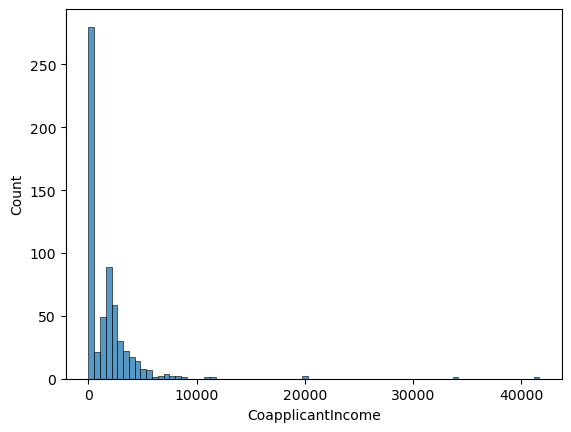

In [79]:
sns.histplot(train['CoapplicantIncome'])

C:\Users\dsanr\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

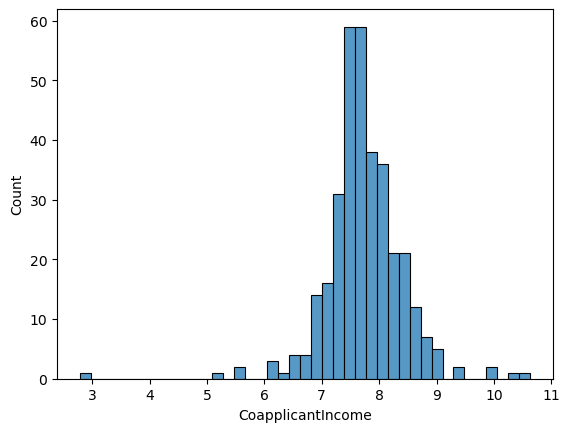

In [81]:
sns.histplot(np.log(train['CoapplicantIncome']))

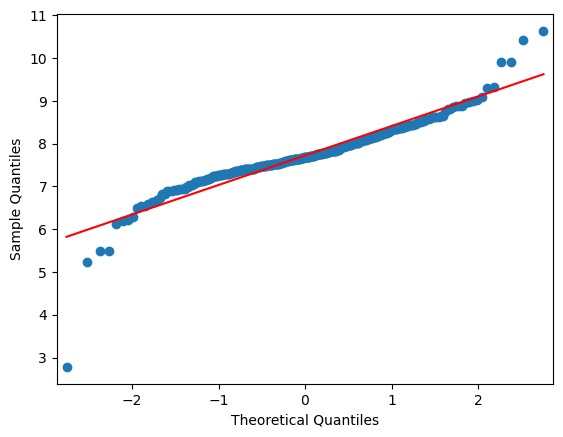

In [83]:
sm.qqplot(np.log(train[train['CoapplicantIncome']!=0]['CoapplicantIncome']), line='s');

## Loan Amount

<Axes: xlabel='LoanAmount', ylabel='Count'>

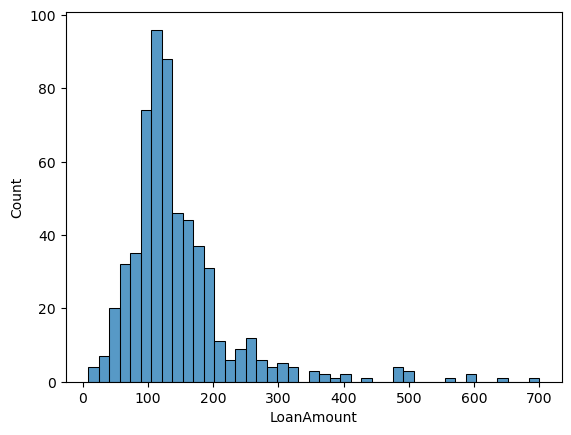

In [85]:
sns.histplot(train['LoanAmount'])

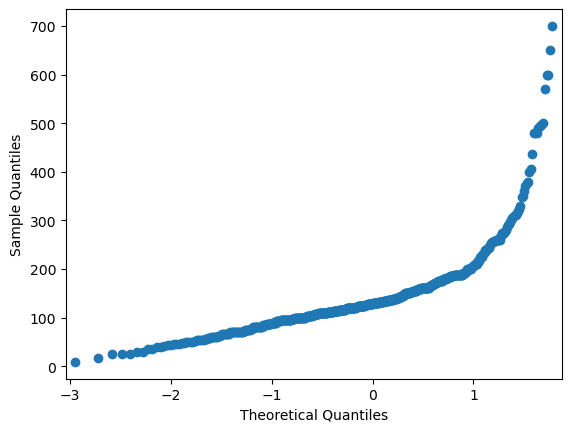

In [86]:
sm.qqplot(train['LoanAmount'], line='s');

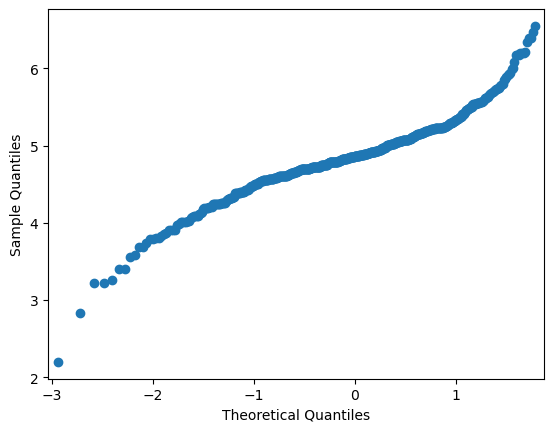

In [87]:
sm.qqplot(np.log(train['LoanAmount']), line='s');

## Loan Amount Term

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

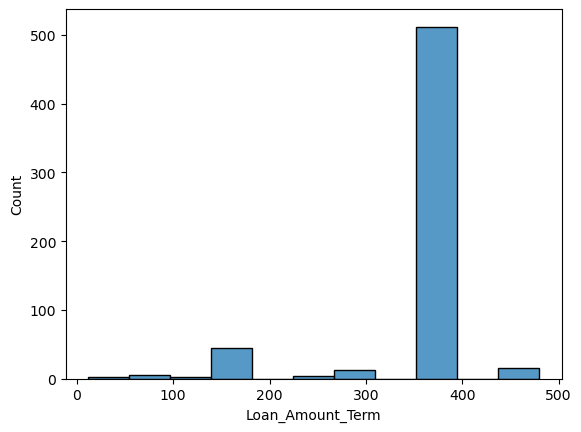

In [92]:
sns.histplot(train['Loan_Amount_Term'])

In [93]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [94]:
test['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64

In [95]:
train[train['Loan_Amount_Term'] < 180]

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
14     Male     Yes          2      Graduate            No             1299   
68     Male     Yes         3+  Not Graduate           Yes             7100   
94     Male      No          0  Not Graduate            No             3620   
133    Male     Yes          0      Graduate           Yes             3459   
242    Male      No          0      Graduate            No             2965   
262  Female      No          1      Graduate            No             3481   
313    Male     Yes          2      Graduate           Yes             5746   
495  Female     Yes          1      Graduate            No             3326   
497    Male     Yes          0      Graduate            No             4625   
546    Male      No          0  Not Graduate            No             3358   
575    Male     Yes          2      Graduate            No             3159   
585    Male     Yes          1      Graduate            No             4283   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
14              1086.0        17.0             120.0             1.0   
68                 0.0       125.0              60.0             1.0   
94                 0.0        25.0             120.0             1.0   
133                0.0        25.0             120.0             1.0   
242             5701.0       155.0              60.0             1.0   
262                0.0       155.0              36.0             1.0   
313                0.0       144.0              84.0             NaN   
495              913.0       105.0              84.0             1.0   
497             2857.0       111.0              12.0             NaN   
546                0.0        80.0              36.0             1.0   
575              461.0       108.0              84.0             1.0   
585             3000.0       172.0              84.0             1.0   

    Property_Area  Loan_Status  Coapplicant  Combined_Income          EMI  
14          Urban            1            1           2385.0   141.666667  
68          Urban            1            0           7100.0  2083.333333  
94      Semiurban            1            0           3620.0   208.333333  
133     Semiurban            1            0           3459.0   208.333333  
242         Urban            1            1           8666.0  2583.333333  
262     Semiurban            0            0           3481.0  4305.555556  
313         Rural            1            0           5746.0  1714.285714  
495     Semiurban            1            1           4239.0  1250.000000  
497         Urban            1            1           7482.0  9250.000000  
546     Semiurban            0            0           3358.0  2222.222222  
575         Urban            1            1           3620.0  1285.714286  
585         Rural            0            1           7283.0  2047.619048

# Preprocessing

In [147]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [148]:
X = train.drop(columns=['Loan_Status'])

In [149]:
y = train['Loan_Status']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)

In [151]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [152]:
continuous

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [153]:
log = ColumnTransformer([('cont', FunctionTransformer(np.log1p, feature_names_out='one-to-one', validate=True),
                        continuous)], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

## impute

In [154]:
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [155]:
ohe_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']

In [156]:
ord_columns = ['Dependents', 'Property_Area']

In [157]:
X_train.isna().mean()

Gender               0.019565
Married              0.002174
Dependents           0.017391
Education            0.000000
Self_Employed        0.050000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.034783
Loan_Amount_Term     0.023913
Credit_History       0.078261
Property_Area        0.000000
dtype: float64

In [158]:
imputer = ColumnTransformer([('cont', SimpleImputer(strategy='median'), continuous), 
                            ('cat', SimpleImputer(strategy='most_frequent'), ohe_columns+ord_columns)], 
                            verbose_feature_names_out=False).set_output(transform='pandas')

In [159]:
imputer.fit(X_train)

ColumnTransformer(transformers=[('cont', SimpleImputer(strategy='median'),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term']),
                                ('cat', SimpleImputer(strategy='most_frequent'),
                                 ['Gender', 'Married', 'Education',
                                  'Self_Employed', 'Credit_History',
                                  'Dependents', 'Property_Area'])],
                  verbose_feature_names_out=False)

In [160]:
imputer.feature_names_in_

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype=object)

In [161]:
imputer.get_feature_names_out()

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender', 'Married', 'Education',
       'Self_Employed', 'Credit_History', 'Dependents', 'Property_Area'],
      dtype=object)

In [162]:
X_train = imputer.transform(X_train)

In [163]:
X_test = imputer.transform(X_test)

## scale

In [164]:
scaling = ColumnTransformer([('scale', StandardScaler(), continuous),
                             ('ohe', OneHotEncoder(drop='first', sparse_output=False), ohe_columns),
                 ('ord', OrdinalEncoder(categories=[['0', '1', '2', '3+'], ['Rural', 'Semiurban', 'Urban']]), ord_columns)], 
                           verbose_feature_names_out=False)

In [165]:
pipe = Pipeline([('log', log), ('scale', scaling)]).set_output(transform='pandas')

In [166]:
pipe.fit(X_train)

Pipeline(steps=[('log',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cont',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term'])],
                                   verbose_feature_names_out=False)),
                ('scale',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['0',
                                                                              '1',
                                                                              '2',
                                                                              '3+'],
                                                                             ['Rural',
                                                                              'Semiurban',
                                                                              'Urban']]),
                                                  ['Dependents',
                                                   'Property_Area'])],
                                   verbose_feature_names_out=False))])

In [117]:
scaling.fit(X_train)

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term', 'EMI']),
                                ('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Gender', 'Married', 'Education',
                                  'Self_Employed', 'Credit_History']),
                                ('ord',
                                 OrdinalEncoder(categories=[['0', '1', '2',
                                                             '3+'],
                                                            ['Rural',
                                                             'Semiurban',
                                                             'Urban']]),
                                 ['Dependents', 'Property_Area'])],
                  verbose_feature_names_out=False)

In [118]:
scaling.feature_names_in_

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'EMI', 'Gender', 'Married', 'Education',
       'Self_Employed', 'Credit_History', 'Dependents', 'Property_Area'],
      dtype=object)

In [119]:
scaling.get_feature_names_out()

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'EMI', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Credit_History_1.0', 'Dependents', 'Property_Area'], dtype=object)

In [120]:
scaling_columns = scaling.get_feature_names_out()

In [121]:
scaling_columns

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'EMI', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Credit_History_1.0', 'Dependents', 'Property_Area'], dtype=object)

In [122]:
X_train = pd.DataFrame(scaling.fit_transform(X_train), columns=scaling_columns)

In [167]:
X_train = pipe.fit_transform(X_train)

In [168]:
X_test = pipe.fit_transform(X_test)

In [132]:
X_test = pd.DataFrame(scaling.transform(X_test), columns=scaling_columns)

In [170]:
X_train.dtypes

ApplicantIncome           float64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Gender_Male               float64
Married_Yes               float64
Education_Not Graduate    float64
Self_Employed_Yes         float64
Credit_History_1.0        float64
Dependents                float64
Property_Area             float64
dtype: object

# Predictions on train data

In [171]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier,RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, precision_recall_curve, det_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, DetCurveDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [172]:
from xgboost import XGBClassifier

In [173]:
from lightgbm import LGBMClassifier

C:\Users\dsanr\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [139]:
X_train = X_train.drop(columns=['EMI'])

In [140]:
X_test = X_test.drop(columns=['EMI'])

In [174]:
def model_score(model):
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train), model.score(X_test, y_test))
    return model

## Logistic Regression

In [175]:
lr = LogisticRegression(max_iter=1000)

In [176]:
lr = model_score(lr)

0.8152173913043478 0.7922077922077922


In [177]:
pred = lr.predict(X_test)

In [178]:
pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [179]:
pred_prob = pd.DataFrame(lr.predict_proba(X_test), index=y_test.index)

In [180]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.44      0.60        55
           1       0.76      0.99      0.86        99

    accuracy                           0.79       154
   macro avg       0.86      0.71      0.73       154
weighted avg       0.83      0.79      0.77       154



<Axes: >

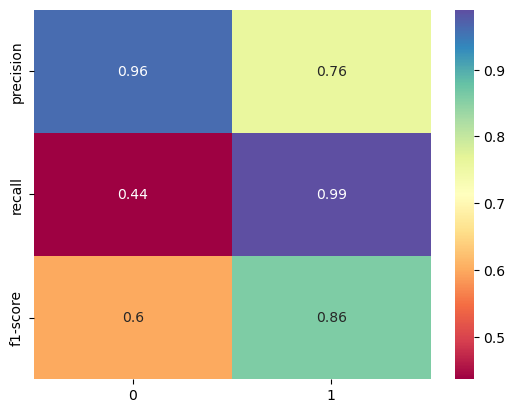

In [181]:
sns.heatmap(pd.DataFrame(classification_report(y_test, pred, output_dict=True)).iloc[:-1, :2],
            cmap='Spectral', annot=True)

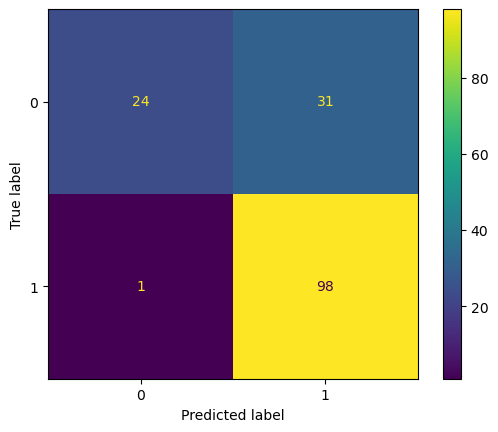

In [182]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

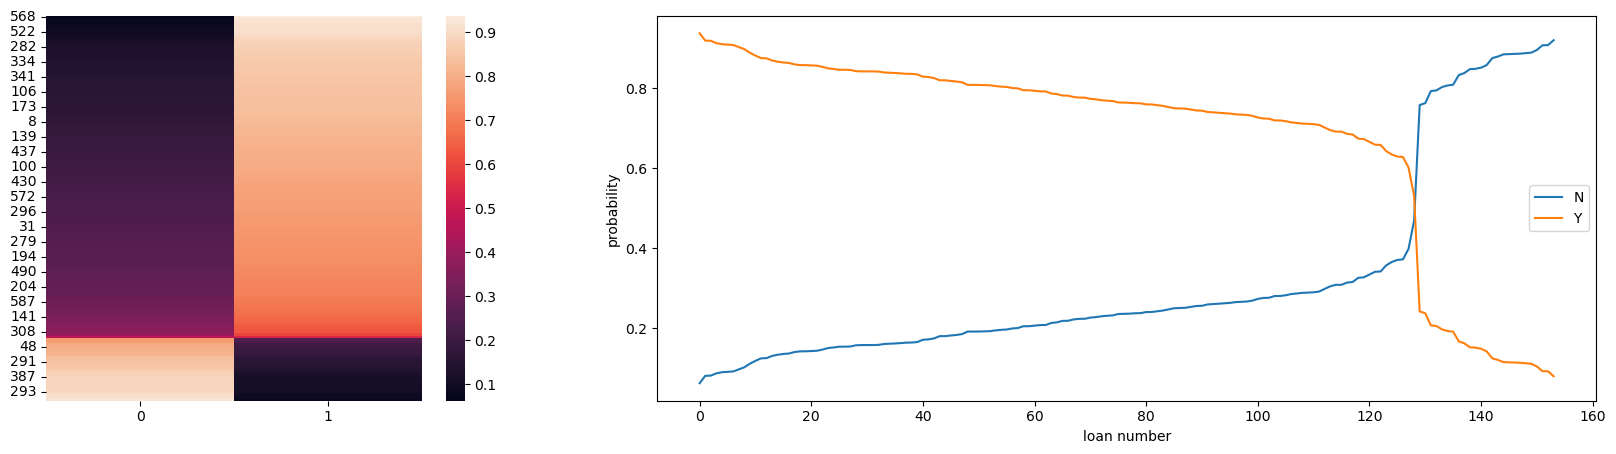

In [183]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), gridspec_kw={'width_ratios': [1, 2]})
sns.heatmap(pred_prob.sort_values(by=0), ax=ax1)
ax2.plot(pred_prob.sort_values(by=0).values)
ax2.set_xlabel('loan number')
ax2.set_ylabel('probability')
ax2.legend(['N', 'Y'])

In [184]:
def classification_metrics(y_test, pred_pos):
    
    fig, axes = plt.subplots(2,3, figsize=(15,8))
    
    # precision-recall curve with maximum f1 score marked and confusion matrix at that point
    precision, recall, thresholds = precision_recall_curve(y_test, pred_pos)
    f1 = (2 * precision * recall) / (precision + recall)
    index_max_f1 = np.nanargmax(f1)
    f1_thresh = thresholds[index_max_f1]
    
    PrecisionRecallDisplay.from_predictions(y_test, pred_pos, ax=axes[0, 0])
    axes[0, 0].scatter(recall[index_max_f1], precision[index_max_f1], 
                       color='green', label=f'max f1 {f1[index_max_f1]:.2f} at {f1_thresh:.2f}')
    axes[0, 0].legend()

    ConfusionMatrixDisplay.from_predictions(y_test, (pred_pos > f1_thresh) * 1, ax=axes[1, 0])
    
    
    # ROC curve with maximum Youden's J marked and confusion matrix at that point
    fpr, tpr, thresholds = roc_curve(y_test, pred_pos)
    Youdens_J = tpr - fpr
    index_max_J = np.nanargmax(Youdens_J)
    J_thresh = thresholds[index_max_J]
    
    RocCurveDisplay.from_predictions(y_test, pred_pos, ax=axes[0, 1])
    axes[0, 1].scatter(fpr[index_max_J], tpr[index_max_J], 
                       color='green', label=f'max J {Youdens_J[index_max_J]:.2f} at {J_thresh:.2f}')
    axes[0, 1].plot([0, 1], [0, 1],'r--')
    axes[0, 1].legend()
    
    ConfusionMatrixDisplay.from_predictions(y_test, (pred_pos > J_thresh) * 1, ax=axes[1, 1])
    
    
    # Det curve with minimum total error marked and confusion matrix at that point
    fpr, fnr, thresholds = det_curve(y_test, pred_pos)
    error = fpr + fnr
    index_min_error = np.nanargmin(error)
    error_thresh = thresholds[index_min_error]
    
    DetCurveDisplay.from_predictions(y_test, pred_pos, ax=axes[0, 2])
    axes[0, 2].scatter(sp.stats.norm.ppf(fpr[index_min_error]), sp.stats.norm.ppf(fnr[index_min_error]),
                       color='green',label=f'min error {error[index_min_error]:.2f} at {error_thresh:.2f}')
    axes[0,2].legend()
    
    ConfusionMatrixDisplay.from_predictions(y_test, (pred_pos > error_thresh) * 1, ax=axes[1, 2])
    

C:\Users\dsanr\AppData\Local\Temp\ipykernel_11152\3851249163.py:7: RuntimeWarning: invalid value encountered in divide
  f1 = (2 * precision * recall) / (precision + recall)


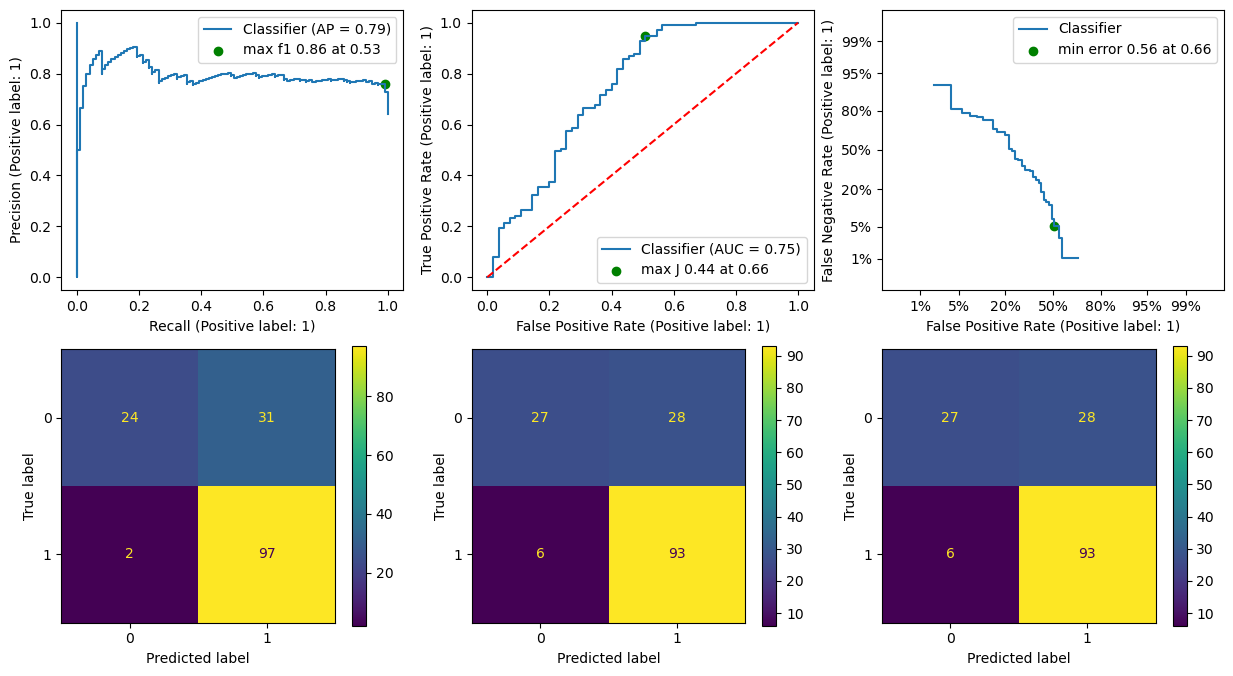

In [185]:
classification_metrics(y_test, pred_prob[1])

Text(0.5, 1.0, 'blue - actual true')

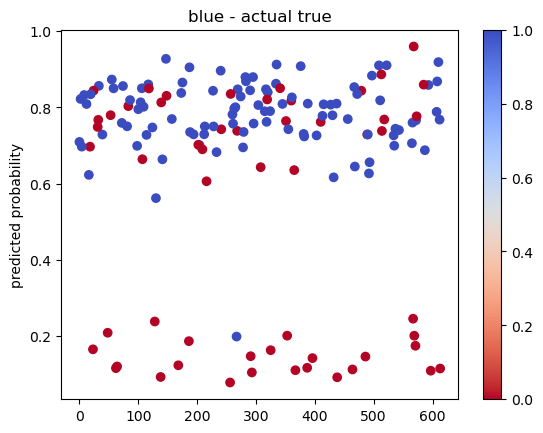

In [153]:
plt.scatter(pred_prob.index, pred_prob[1], c=y_test.values, cmap='coolwarm_r')
plt.colorbar()
plt.ylabel('predicted probability')
plt.title('blue - actual true')

In [186]:
probabilities = pd.DataFrame({'prob':pred_prob[1], 'actual':y_test}).sort_values(['prob'], ascending=False)

Text(0.5, 1.0, 'blue - actual true')

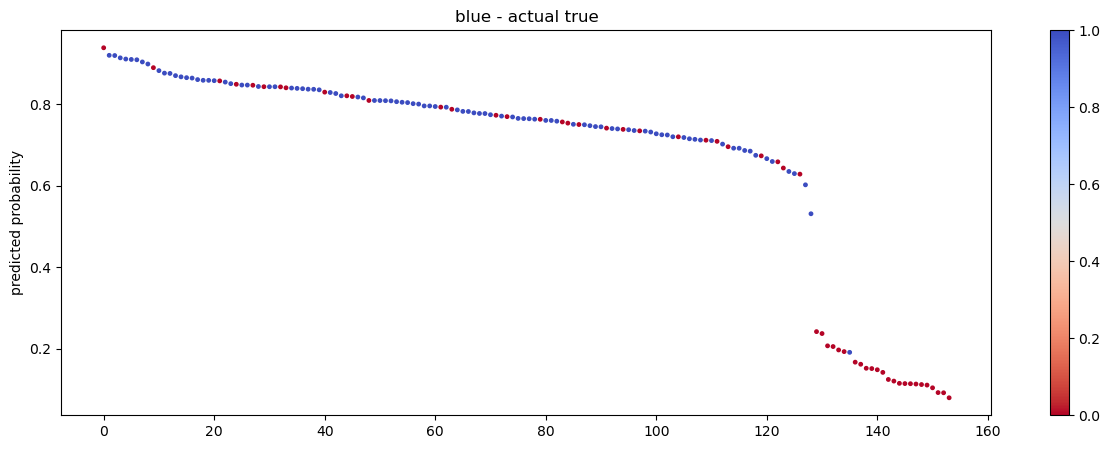

In [187]:
plt.figure(figsize=(15,5))
plt.scatter(range(len(probabilities)), probabilities['prob'], c=probabilities['actual'], s=6, cmap='coolwarm_r')
plt.colorbar()
plt.clim(0,1)
plt.ylabel('predicted probability')
plt.title('blue - actual true')

In [188]:
coeff = pd.DataFrame({'columns':X_train.columns, 'coef':(lr.coef_[0])})
coeff.sort_values(by='coef', ascending=False)

columns      coef
8       Credit_History_1.0  3.132323
5              Married_Yes  0.381236
1        CoapplicantIncome  0.245626
0          ApplicantIncome  0.229560
9               Dependents  0.061273
7        Self_Employed_Yes  0.010127
3         Loan_Amount_Term -0.018986
10           Property_Area -0.083609
4              Gender_Male -0.186994
2               LoanAmount -0.387536
6   Education_Not Graduate -0.489364

In [190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [191]:
from statsmodels.tools.tools import add_constant

In [192]:
xx = add_constant(X_train)

In [193]:
pd.DataFrame({'feature': X_train.columns, 'vif':[variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]})

feature       vif
0          ApplicantIncome  1.937096
1        CoapplicantIncome  1.566859
2               LoanAmount  1.658529
3         Loan_Amount_Term  1.037929
4              Gender_Male  5.204778
5              Married_Yes  3.817934
6   Education_Not Graduate  1.349696
7        Self_Employed_Yes  1.197398
8       Credit_History_1.0  4.158340
9               Dependents  1.811787
10           Property_Area  2.490786

In [200]:
pd.DataFrame({'feature': xx.columns, 'vif':[variance_inflation_factor(xx, i) for i in range(xx.shape[1])]})

feature        vif
0                    const  15.554619
1          ApplicantIncome   1.964969
2        CoapplicantIncome   1.608680
3               LoanAmount   1.662882
4         Loan_Amount_Term   1.044440
5              Gender_Male   1.193099
6              Married_Yes   1.316559
7   Education_Not Graduate   1.092170
8        Self_Employed_Yes   1.046863
9       Credit_History_1.0   1.029445
10              Dependents   1.185283
11           Property_Area   1.021867

In [199]:
pd.DataFrame({'feature': X_train.columns, 'vif': np.linalg.inv(X_train.corr()).diagonal()}).sort_values(by='vif', ascending=True)

feature       vif
10           Property_Area  1.021867
8       Credit_History_1.0  1.029445
3         Loan_Amount_Term  1.044440
7        Self_Employed_Yes  1.046863
6   Education_Not Graduate  1.092170
9               Dependents  1.185283
4              Gender_Male  1.193099
5              Married_Yes  1.316559
1        CoapplicantIncome  1.608680
2               LoanAmount  1.662882
0          ApplicantIncome  1.964969

In [196]:
X_train.corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome                1.000000          -0.391607    0.488744   
CoapplicantIncome             -0.391607           1.000000    0.125081   
LoanAmount                     0.488744           0.125081    1.000000   
Loan_Amount_Term              -0.034829           0.083003    0.091926   
Gender_Male                    0.103952           0.193385    0.096589   
Married_Yes                    0.082695           0.263466    0.203200   
Education_Not Graduate        -0.200624           0.056885   -0.171209   
Self_Employed_Yes              0.188117          -0.081708    0.113972   
Credit_History_1.0             0.025336          -0.020114   -0.035180   
Dependents                     0.137518          -0.034643    0.211125   
Property_Area                 -0.049050          -0.063411   -0.094594   

                        Loan_Amount_Term  Gender_Male  Married_Yes  \
ApplicantIncome                -0.034829     0.103952     0.082695   
CoapplicantIncome               0.083003     0.193385     0.263466   
LoanAmount                      0.091926     0.096589     0.203200   
Loan_Amount_Term                1.000000    -0.039498    -0.024755   
Gender_Male                    -0.039498     1.000000     0.337867   
Married_Yes                    -0.024755     0.337867     1.000000   
Education_Not Graduate         -0.070062     0.069529     0.008019   
Self_Employed_Yes              -0.035848     0.029851    -0.006971   
Credit_History_1.0              0.001259    -0.011169    -0.015328   
Dependents                     -0.106429     0.157667     0.296290   
Property_Area                  -0.076721    -0.009118    -0.006198   

                        Education_Not Graduate  Self_Employed_Yes  \
ApplicantIncome                      -0.200624           0.188117   
CoapplicantIncome                     0.056885          -0.081708   
LoanAmount                           -0.171209           0.113972   
Loan_Amount_Term                     -0.070062          -0.035848   
Gender_Male                           0.069529           0.029851   
Married_Yes                           0.008019          -0.006971   
Education_Not Graduate                1.000000          -0.011039   
Self_Employed_Yes                    -0.011039           1.000000   
Credit_History_1.0                   -0.125731           0.060277   
Dependents                            0.055633           0.066135   
Property_Area                        -0.028744          -0.016075   

                        Credit_History_1.0  Dependents  Property_Area  
ApplicantIncome                   0.025336    0.137518      -0.049050  
CoapplicantIncome                -0.020114   -0.034643      -0.063411  
LoanAmount                       -0.035180    0.211125      -0.094594  
Loan_Amount_Term                  0.001259   -0.106429      -0.076721  
Gender_Male                      -0.011169    0.157667      -0.009118  
Married_Yes                      -0.015328    0.296290      -0.006198  
Education_Not Graduate           -0.125731    0.055633      -0.028744  
Self_Employed_Yes                 0.060277    0.066135      -0.016075  
Credit_History_1.0                1.000000   -0.078179      -0.007371  
Dependents                       -0.078179    1.000000      -0.014177  
Property_Area                    -0.007371   -0.014177       1.000000

## Decision tree

In [201]:
parameters = {'criterion':('gini', 'entropy'), 'min_samples_split':(2,4,6), 'max_depth':(5, 7, 9)}

In [202]:
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=parameters, n_jobs=-1, cv=3, verbose=1)

In [203]:
distributions = {'criterion':('gini', 'entropy'), 
                 'min_samples_split': sp.stats.randint(2, 8), 
                 'max_depth': sp.stats.randint(3, 8)}

In [204]:
clf = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=distributions, n_iter=20, n_jobs=-1)

In [205]:
clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018FE4378F90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018FE872B890>})

In [206]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [210]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=3, max_depth=3)

In [211]:
dt = model_score(dt)

0.8282608695652174 0.7792207792207793


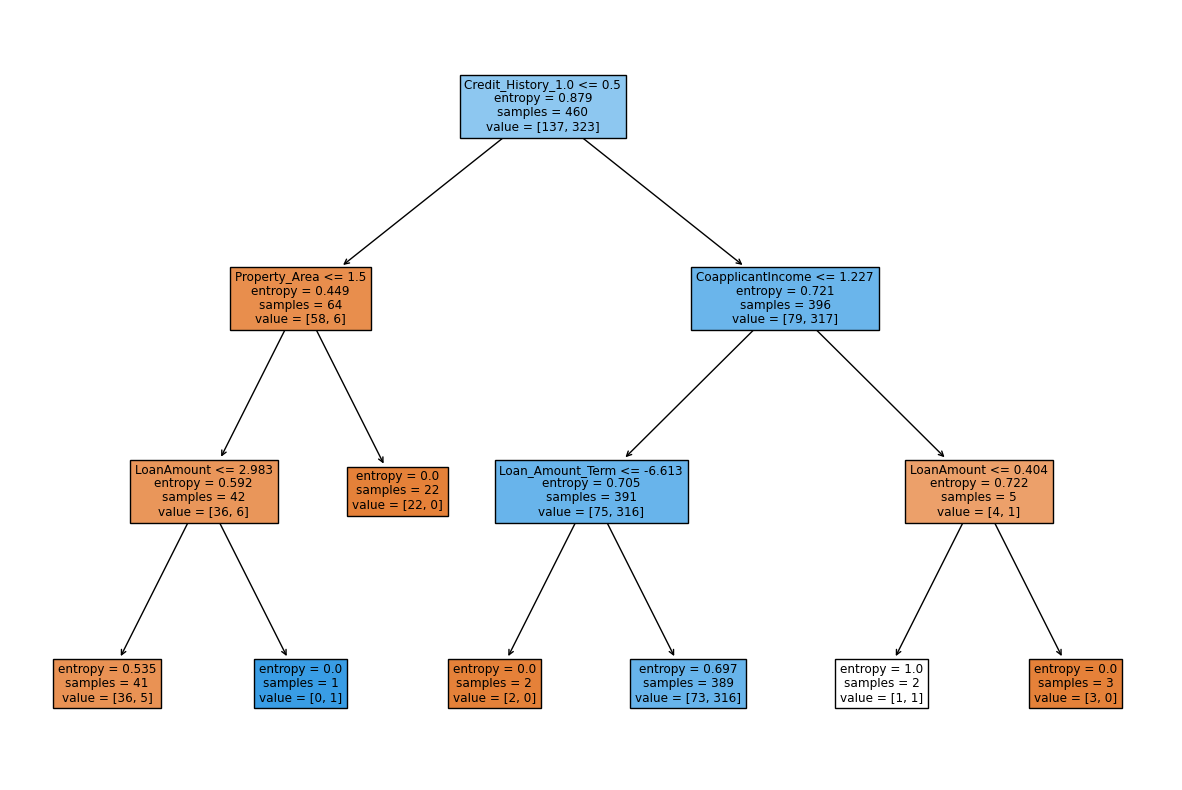

In [212]:
plt.figure(figsize=(15,10))
plot_tree(dt, feature_names=X_train.columns.to_list(), filled=True, max_depth=3)
plt.show()

In [179]:
feature_imp = pd.DataFrame({'columns':X_train.columns, 'coef':dt.feature_importances_})
feature_imp.sort_values(by='coef', ascending=False)

columns      coef
8       Credit_History_1.0  0.773601
2               LoanAmount  0.067863
1        CoapplicantIncome  0.052622
3         Loan_Amount_Term  0.041244
10           Property_Area  0.033343
5              Married_Yes  0.017484
0          ApplicantIncome  0.013843
4              Gender_Male  0.000000
6   Education_Not Graduate  0.000000
7        Self_Employed_Yes  0.000000
9               Dependents  0.000000

In [180]:
result = permutation_importance(dt, X_train, y_train)

In [181]:
feature_imp = pd.DataFrame({'columns':X_train.columns, 'coef':result.importances_mean})
feature_imp.sort_values(by='coef', ascending=False)

columns      coef
8       Credit_History_1.0  0.176087
1        CoapplicantIncome  0.013913
3         Loan_Amount_Term  0.006957
2               LoanAmount  0.002609
0          ApplicantIncome  0.000000
4              Gender_Male  0.000000
5              Married_Yes  0.000000
6   Education_Not Graduate  0.000000
7        Self_Employed_Yes  0.000000
9               Dependents  0.000000
10           Property_Area  0.000000

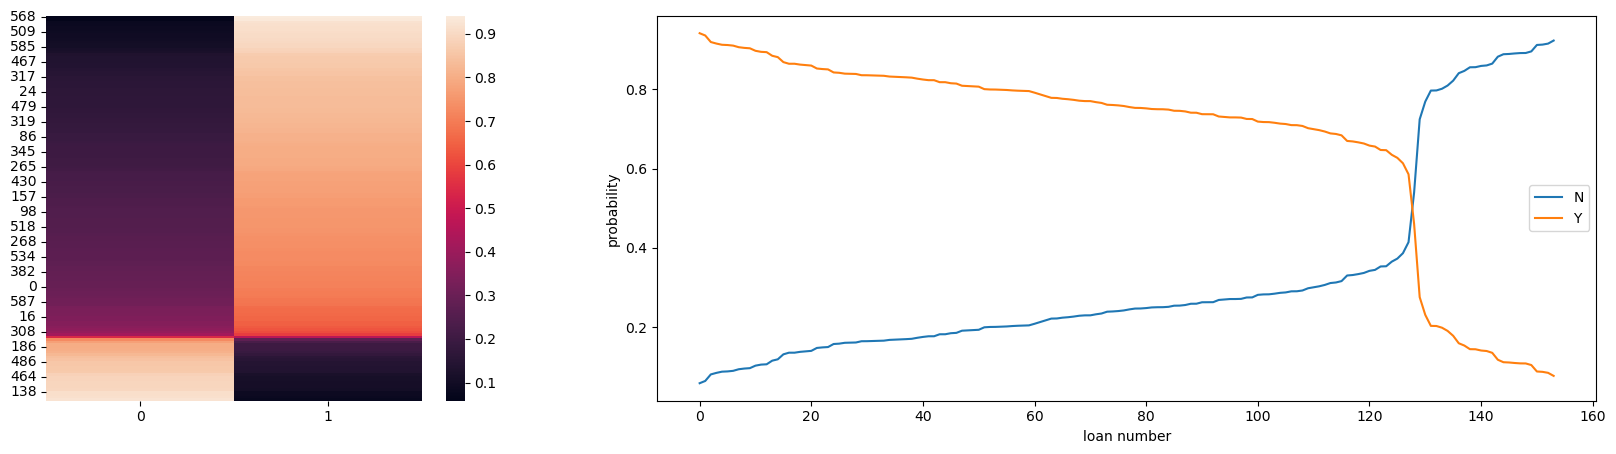

In [152]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), gridspec_kw={'width_ratios': [1, 2]})
sns.heatmap(pred_prob.sort_values(by=0), ax=ax1)
ax2.plot(pred_prob.sort_values(by=0).values)
ax2.set_xlabel('loan number')
ax2.set_ylabel('probability')
ax2.legend(['N', 'Y'])

/tmp/ipykernel_5030/3851249163.py:7: RuntimeWarning: invalid value encountered in true_divide
  f1 = (2 * precision * recall) / (precision + recall)


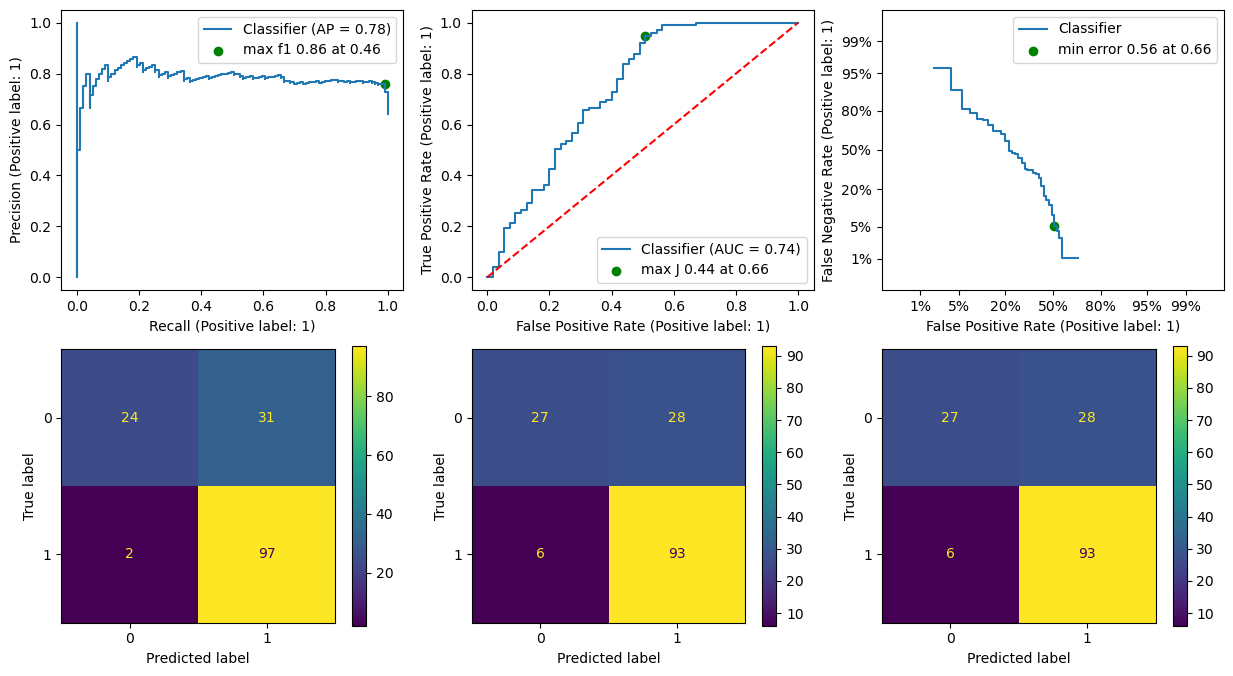

In [153]:
classification_metrics(y_test, pred_prob[1])

## Random Forest

In [208]:
parameters = {'n_estimators': [100, 500, 1000], 'min_samples_split': (3,5), 'max_depth':(5, 7, 9)}

In [209]:
clf = GridSearchCV(RandomForestClassifier(), param_grid=parameters, n_jobs=-1, verbose=1)

In [154]:
distributions = {'n_estimators': sp.stats.randint(100, 1000), 
                 'min_samples_split': sp.stats.randint(2, 8), 
                 'max_depth': sp.stats.randint(3, 8)}

In [155]:
clf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=distributions, n_iter=10, n_jobs=-1, verbose=1)

In [156]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f21a43aa760>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f21a40bce50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f21a43c08e0>},
                   verbose=1)

In [157]:
clf.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_split=4, n_estimators=827)

In [158]:
clf.best_score_

0.817391304347826

In [160]:
rf = model_score(RandomForestClassifier(n_estimators=827, min_samples_split=4, max_depth=4))

0.8239130434782609 0.7922077922077922


In [161]:
feature_imp = pd.DataFrame({'columns':X_train.columns, 'coef':rf.feature_importances_})
feature_imp.sort_values(by='coef', ascending=False)

columns      coef
8       Credit_History_1.0  0.541496
0          ApplicantIncome  0.104574
2               LoanAmount  0.092725
1        CoapplicantIncome  0.089947
3         Loan_Amount_Term  0.056797
10           Property_Area  0.032079
6   Education_Not Graduate  0.030298
5              Married_Yes  0.019088
9               Dependents  0.018646
7        Self_Employed_Yes  0.007557
4              Gender_Male  0.006794

## SVM

In [307]:
parameters = {'C': (1, 10, 100), 'gamma': (.01,.1,1,10)}

In [308]:
clf = GridSearchCV(SVC(), param_grid=parameters, n_jobs=-1)

In [3]:
distributions = {'C': sp.stats.loguniform(.1, 100), 
                 'gamma': sp.stats.loguniform(.01, 10)}

In [163]:
clf = RandomizedSearchCV(SVC(), param_distributions=distributions, n_iter=10, n_jobs=-1, verbose=1)

In [164]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f219d7d60d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f219d7a62b0>},
                   verbose=1)

In [165]:
clf.best_estimator_

SVC(C=3.774003451334774, gamma=0.01572368908499353)

In [166]:
clf.best_score_

0.8152173913043479

In [243]:
svc = model_score(SVC(C=.936, gamma=.026, probability=True))

0.8173913043478261 0.7922077922077922


## GBC

In [217]:
parameters = {'n_estimators': [100, 500, 1000], 'min_samples_split': (3,5), 'max_depth':(5, 7, 9)}

In [218]:
clf = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, n_jobs=-1, verbose=1)

In [225]:
distributions = {'n_estimators': sp.stats.randint(100, 1000), 
                 'learning_rate': sp.stats.loguniform(0.001, 10),
                 'min_samples_split': sp.stats.randint(2, 8), 
                 'max_depth': sp.stats.randint(3, 8)}

In [226]:
clf = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=distributions, n_iter=10, n_jobs=-1, verbose=1)

In [227]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A706665EE0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A706665DF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A706650850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A7066503D0>},
                   verbose=1)

In [228]:
clf.best_estimator_

GradientBoostingClassifier(learning_rate=0.0072866417321524, max_depth=5,
                           min_samples_split=7, n_estimators=157)

In [229]:
clf.best_score_

0.7978260869565217

In [230]:
gbc = model_score(GradientBoostingClassifier(n_estimators=157, learning_rate=.007, max_depth=5, min_samples_split=7))

0.8434782608695652 0.7792207792207793


In [231]:
gbc

GradientBoostingClassifier(learning_rate=0.007, max_depth=5,
                           min_samples_split=7, n_estimators=157)

## xgboost optuna

In [214]:
import optuna

In [215]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 3000)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 10, log=True)
    xgb = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
    return cross_val_score(xgb, X_train, y_train, n_jobs=-1, cv=3).mean()

In [216]:
study = optuna.create_study(direction='maximize')

[I 2023-11-12 11:23:55,132] A new study created in memory with name: no-name-77b4310a-a4ae-4e39-9e57-a30276228635


In [217]:
study.optimize(objective, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-11-12 11:24:01,443] Trial 0 finished with value: 0.7521291344820756 and parameters: {'n_estimators': 144, 'max_depth': 9, 'learning_rate': 0.680625800243559}. Best is trial 0 with value: 0.7521291344820756.
[I 2023-11-12 11:24:02,657] Trial 1 finished with value: 0.7607729960671138 and parameters: {'n_estimators': 821, 'max_depth': 11, 'learning_rate': 0.6022422599751981}. Best is trial 1 with value: 0.7607729960671138.
[I 2023-11-12 11:24:03,288] Trial 2 finished with value: 0.7608154372860255 and parameters: {'n_estimators': 2431, 'max_depth': 4, 'learning_rate': 0.0681548160365993}. Best is trial 2 with value: 0.7608154372860255.
[I 2023-11-12 11:24:03,372] Trial 3 finished with value: 0.6022833375774552 and parameters: {'n_estimators': 331, 'max_depth': 11, 'learning_rate': 4.502239386873992}. Best is trial 2 with value: 0.7608154372860255.
[I 2023-11-12 11:24:03,623] Trial 4 finished with value: 0.745607333842628 and parameters: {'n_estimators': 873, 'max_depth': 6, 'learn

In [218]:
study.best_value

0.8152250799309623

In [219]:
study.best_params

{'n_estimators': 474, 'max_depth': 3, 'learning_rate': 0.006228829938625884}

In [220]:
xgb = XGBClassifier(n_estimators=2257, use_label_encoder=False, max_depth=3, learning_rate=.001216)

In [222]:
xgb = XGBClassifier(n_estimators=474, use_label_encoder=False, max_depth=3, learning_rate=.00622)

In [223]:
model_score(xgb)

0.8217391304347826 0.7857142857142857


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.00622, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=474, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

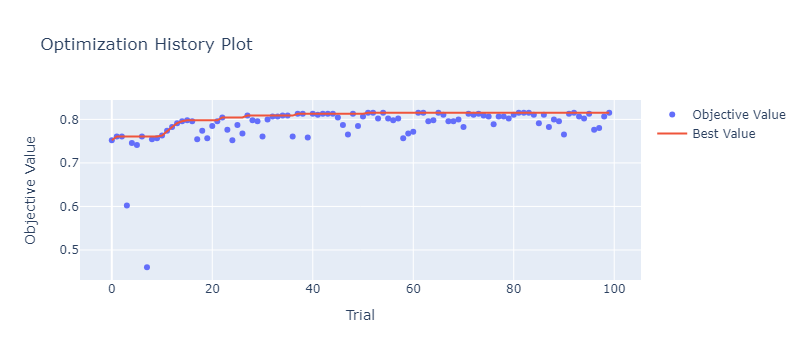

In [224]:
optuna.visualization.plot_optimization_history(study)

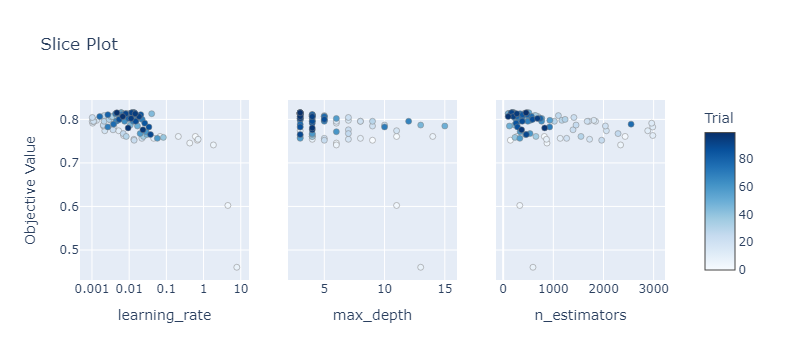

In [225]:
optuna.visualization.plot_slice(study)

## Voting

In [244]:
vote = VotingClassifier(estimators=[('lr', lr), ('rf', rfc), ('svc', svc), ('gb', gbc)], voting='hard')

In [245]:
vote.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     min_samples_split=6,
                                                     n_estimators=275)),
                             ('svc',
                              SVC(C=0.936, gamma=0.026, probability=True)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.007,
                                                         max_depth=5,
                                                         min_samples_split=7,
                                                         n_estimators=157))])

In [246]:
vote.score(X_test, y_test)

0.7857142857142857

In [248]:
model_score(VotingClassifier(estimators=[('lr', lr), ('rf', rfc), ('gb', gbc)], voting='hard'))

0.8217391304347826 0.7857142857142857


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     min_samples_split=6,
                                                     n_estimators=275)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.007,
                                                         max_depth=5,
                                                         min_samples_split=7,
                                                         n_estimators=157))])

# test data

In [226]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [227]:
Loan_ID = test['Loan_ID']

In [228]:
test.drop(columns=['Loan_ID'], inplace=True)

In [225]:
test_new.drop(columns=['Loan_ID'], inplace=True)

In [229]:
test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [230]:
test.isna().mean()

Gender               0.029973
Married              0.000000
Dependents           0.027248
Education            0.000000
Self_Employed        0.062670
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.013624
Loan_Amount_Term     0.016349
Credit_History       0.079019
Property_Area        0.000000
dtype: float64

In [231]:
test['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64

<Axes: xlabel='LoanAmount', ylabel='Count'>

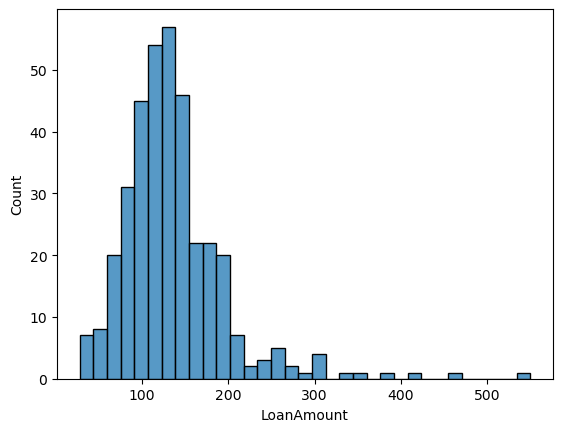

In [232]:
sns.histplot(test['LoanAmount'])

In [233]:
imputer.fit(train)

ColumnTransformer(transformers=[('cont', SimpleImputer(strategy='median'),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term']),
                                ('cat', SimpleImputer(strategy='most_frequent'),
                                 ['Gender', 'Married', 'Education',
                                  'Self_Employed', 'Credit_History',
                                  'Dependents', 'Property_Area'])],
                  verbose_feature_names_out=False)

In [235]:
train = imputer.transform(train)

In [236]:
test = imputer.transform(test)

In [237]:
scaling.fit(train)

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term']),
                                ('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Gender', 'Married', 'Education',
                                  'Self_Employed', 'Credit_History']),
                                ('ord',
                                 OrdinalEncoder(categories=[['0', '1', '2',
                                                             '3+'],
                                                            ['Rural',
                                                             'Semiurban',
                                                             'Urban']]),
                                 ['Dependents', 'Property_Area'])],
                  verbose_feature_names_out=False)

In [238]:
pipe.fit(train)

Pipeline(steps=[('log',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cont',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term'])],
                                   verbose_feature_names_out=False)),
                ('scale',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['0',
                                                                              '1',
                                                                              '2',
                                                                              '3+'],
                                                                             ['Rural',
                                                                              'Semiurban',
                                                                              'Urban']]),
                                                  ['Dependents',
                                                   'Property_Area'])],
                                   verbose_feature_names_out=False))])

In [239]:
train = pipe.transform(train)

In [240]:
test = pipe.transform(test)

In [241]:
labels = pd.read_csv('train.csv')['Loan_Status'].apply(lambda x : 1 if x=='Y' else 0)

In [243]:
xgb.fit(train, labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.00622, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=474, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [244]:
pred = xgb.predict(test)

In [245]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [246]:
result = pd.DataFrame(pred, Loan_ID).reset_index()
result.columns=['Loan_ID', 'Loan_Status']
result

Loan_ID  Loan_Status
0    LP001015            1
1    LP001022            1
2    LP001031            1
3    LP001035            1
4    LP001051            1
..        ...          ...
362  LP002971            1
363  LP002975            1
364  LP002980            1
365  LP002986            1
366  LP002989            1

[367 rows x 2 columns]

In [247]:
result['Loan_Status'] = result['Loan_Status'].apply(lambda x : 'Y' if x == 1 else 'N')

In [248]:
result.to_csv(r'D:\projects\AV\Loan prediction\submission.csv', index=False)